In [31]:
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
from qiskit.visualization import plot_histogram

import warnings
warnings.filterwarnings("ignore")

# A = np.array([[4, -1, -1, 0], [-1, 4, 0, -1], [-1, 0, 4, -1], [0, -1, -1, 4]])

# b = np.array([1.77, 3.11, 3.11, 4.44])

# theta = np.arcsin(np.linalg.norm(np.dot(A, b)) / (np.linalg.norm(A) * np.linalg.norm(b)))
# alpha = 2 * theta
# beta = theta

# qc = QuantumCircuit(3, 1)
# qc.h(0)
# qc.u1(-beta, 1)
# qc.u2(-alpha, np.pi, 2)
# qc.cswap(2, 1, 0)
# qc.u2(alpha, np.pi, 0)
# qc.u1(beta, 0)
# qc.measure(0, 0)

# backend = Aer.get_backend('qasm_simulator')
# job = execute(qc, backend, shots=1024)
# result = job.result()
# counts = result.get_counts()

# plot_histogram(counts)

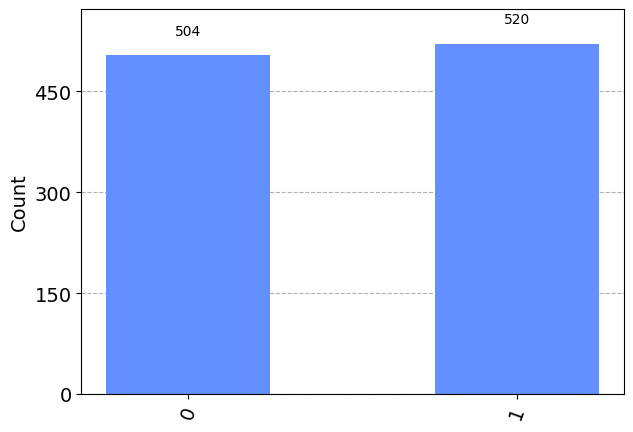

In [32]:
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
from qiskit.visualization import plot_histogram

import warnings
warnings.filterwarnings("ignore")

A = np.array([[4, -1, -1, 0], [-1, 4, 0, -1], [-1, 0, 4, -1], [0, -1, -1, 4]])

b = np.array([1.77, 3.11, 3.11, 4.44])

theta = np.arcsin(np.linalg.norm(np.dot(A, b)) / (np.linalg.norm(A) * np.linalg.norm(b)))
alpha = 2 * theta
beta = theta

qc = QuantumCircuit(6, 1)
qc.h(0)
qc.rx(-beta, 1)
qc.rx(-alpha, 2)
qc.cswap(2, 1, 0)
qc.rx(alpha, 0)
qc.cswap(2, 1, 0)
qc.rx(-alpha, 2)
qc.cswap(3, 1, 0)
qc.rx(alpha, 0)
qc.cswap(3, 1, 0)
qc.rx(beta, 0)
qc.measure(0, 0)

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)


In [35]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
import time

A = np.array([[4, -1, -1, 0], [-1, 4, 0, -1], [-1, 0, 4, -1], [0, -1, -1, 4]])
b = np.array([1.77, 3.11, 3.11, 4.44])

theta = np.arcsin(np.linalg.norm(np.dot(A, b)) / (np.linalg.norm(A) * np.linalg.norm(b)))
alpha = 2 * theta
beta = theta

start_time = time.time()
qreg = QuantumRegister(3)
creg = ClassicalRegister(1)
qc = QuantumCircuit(qreg, creg)

qc.h(0)
qc.rx(-beta, 1)
qc.ry(-alpha, 2)
qc.cswap(2, 1, 0)
qc.ry(alpha, 0)
qc.rx(beta, 0)
qc.measure(0, 0)

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
counts = job.result().get_counts()
x = np.dot(np.linalg.inv(A), b)
psi = np.zeros_like(x)
psi[0] = np.sqrt(counts['0']) / np.sqrt(sum(counts.values()))
psi[1] = np.sqrt(counts['1']) / np.sqrt(sum(counts.values()))
psi[2] = np.sqrt(counts['0']) / np.sqrt(sum(counts.values()))
psi[3] = np.sqrt(counts['1']) / np.sqrt(sum(counts.values()))

x_norm = np.linalg.norm(x)
psi_x = np.dot(psi, x) / x_norm
solution = psi_x * x
end_time = time.time()
print(end_time-start_time)

print("The solution Ax=b is: ", solution)


0.012711048126220703
The solution Ax=b is:  [1.70365633 2.17104137 2.17104137 2.63609822]


In [36]:
from qiskit import *
IBMQ.save_account('e37e7fa9a98deedf5322b5fa313e3b1a40e0f2d993add5669c62f037f778c8a97d21b6cea08b2cc8ee6b1fe96cce5ea94a13b14cb50f3aeba375ecf98f6b318e', overwrite=True)

In [37]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-07-26 08:07:59,208: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
start_time = time.time()
qreg = QuantumRegister(3)
creg = ClassicalRegister(1)
qc = QuantumCircuit(qreg, creg)

qc.h(0)
qc.rx(-beta, 1)
qc.ry(-alpha, 2)
qc.cswap(2, 1, 0)
qc.ry(alpha, 0)
qc.rx(beta, 0)
qc.measure(0, 0)

backend = provider.get_backend("ibmq_jakarta")
job = execute(qc, backend, shots=1024)
counts = job.result().get_counts()
x = np.dot(np.linalg.inv(A), b)
psi = np.zeros_like(x)
psi[0] = np.sqrt(counts['0']) / np.sqrt(sum(counts.values()))
psi[1] = np.sqrt(counts['1']) / np.sqrt(sum(counts.values()))
psi[2] = np.sqrt(counts['0']) / np.sqrt(sum(counts.values()))
psi[3] = np.sqrt(counts['1']) / np.sqrt(sum(counts.values()))

x_norm = np.linalg.norm(x)
psi_x = np.dot(psi, x) / x_norm
solution = psi_x * x
end_time = time.time()
print(end_time-start_time)

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
import time

A = np.array([[4, -1, -1, 0], [-1, 4, 0, -1], [-1, 0, 4, -1], [0, -1, -1, 4]])
b = np.array([1.77, 3.11, 3.11, 4.44])

theta = np.arcsin(np.linalg.norm(np.dot(A, b)) / (np.linalg.norm(A) * np.linalg.norm(b)))
alpha = 2 * theta
beta = theta

start_time = time.time()
qreg = QuantumRegister(3)
creg = ClassicalRegister(1)
qc = QuantumCircuit(qreg, creg)

qc.h(0)
qc.rx(-beta, 1)
qc.ry(-alpha, 2)
qc.cswap(2, 1, 0)
qc.ry(alpha, 0)
qc.rx(beta, 0)
qc.measure(0, 0)

# backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
counts = job.result().get_counts()
x = np.dot(np.linalg.inv(A), b)
psi = np.zeros_like(x)
psi[0] = np.sqrt(counts['0']) / np.sqrt(sum(counts.values()))
psi[1] = np.sqrt(counts['1']) / np.sqrt(sum(counts.values()))
psi[2] = np.sqrt(counts['0']) / np.sqrt(sum(counts.values()))
psi[3] = np.sqrt(counts['1']) / np.sqrt(sum(counts.values()))

x_norm = np.linalg.norm(x)
psi_x = np.dot(psi, x) / x_norm
solution = psi_x * x
end_time = time.time()
print(end_time-start_time)

print("The solution Ax=b is: ", solution)

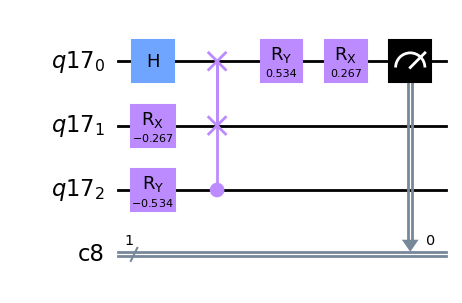

In [20]:
qc.draw('mpl')

In [25]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.u(-0.267, 0, 0, qreg_q[1])
circuit.u(-0.534, 3.14, 0, qreg_q[2])
circuit.cswap(qreg_q[2], qreg_q[0], qreg_q[1])
circuit.u(0.534, 3.14, 0, qreg_q[0])
circuit.u(0.267, 0, 0, qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

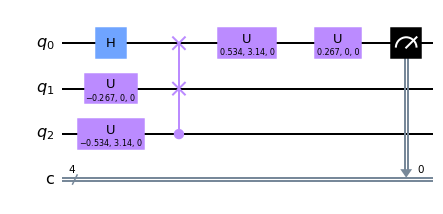

In [26]:
circuit.draw('mpl')

In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer

# Define matrix A and vector b
A = np.array([[1, -1/2], [-1/2, 1]])
b = np.array([1, 0])

# Calculate theta
theta = np.arcsin(np.linalg.norm(np.dot(A, b)) / (np.linalg.norm(A) * np.linalg.norm(b)))
alpha = 2 * theta
beta = theta

# Create quantum circuit
qreg = QuantumRegister(4)
creg = ClassicalRegister(1)
qc = QuantumCircuit(qreg, creg)

qc.h(0)
qc.u1(-beta, 1)
qc.u1(-beta, 2)
qc.u2(-alpha, np.pi, 3)
qc.cswap(3, 2, 1)
qc.cswap(2, 1, 0)
qc.u2(alpha, np.pi, 0)
qc.u1(beta, 1)
qc.u1(beta, 2)
qc.measure(0, 0)

# Execute the circuit on a simulator
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
counts = job.result().get_counts()

# Compute probability amplitudes
if '1' in counts:
    psi = np.array([np.sqrt(counts['0']) / np.sqrt(sum(counts.values())), np.sqrt(counts['1']) / np.sqrt(sum(counts.values()))])
else:
    psi = np.array([np.sqrt(counts['0']) / np.sqrt(sum(counts.values())), 0])

# Calculate solution x
x = np.dot(np.linalg.inv(A), b)
x_norm = np.linalg.norm(x)
psi_x = np.dot(psi, x) / x_norm
solution = psi_x * x

print("The solution Ax=b is: ", solution)


Traceback (most recent call last):
  Cell In[1], line 19
    qc.u1(-beta, 1)
AttributeError: 'QuantumCircuit' object has no attribute 'u1'

Use %tb to get the full traceback.


In [4]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer

A = np.array([[1, -1/2], [-1/2, 1]])
b = np.array([1, 0])

theta = np.arcsin(np.linalg.norm(np.dot(A, b)) / (np.linalg.norm(A) * np.linalg.norm(b)))
alpha = 2 * theta
beta = theta

qreg = QuantumRegister(4)
creg = ClassicalRegister(1)
qc = QuantumCircuit(qreg, creg)

qc.h(qreg[0])
qc.rz(-beta, qreg[1])
qc.rz(-beta, qreg[2])
qc.ry(-alpha, qreg[3])
qc.cswap(qreg[3], qreg[2], qreg[1])
qc.cswap(qreg[2], qreg[1], qreg[0])
qc.ry(alpha, qreg[0])
qc.rz(beta, qreg[1])
qc.rz(beta, qreg[2])
qc.measure(qreg[0], creg[0])

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()

counts = result.get_counts(qc)
print(counts)


{'1': 1024}


In [258]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer

# Define matrix A and vector b
A = np.array([[4, -1, 0, 0], [-1, 4, -1, 0], [0, -1, 4, -1], [0, 0, -1, 3]])
b = np.array([1, 0, 0, 1])

# Calculate theta
theta = np.arcsin(np.linalg.norm(np.dot(A, b)) / (np.linalg.norm(A) * np.linalg.norm(b)))
alpha = 2 * theta
beta = theta

# Create quantum circuit
qreg = QuantumRegister(5)
creg = ClassicalRegister(1)
qc = QuantumCircuit(qreg, creg)

qc.h(0)
qc.u1(-beta, 1)
qc.u1(-beta, 2)
qc.u1(-beta, 3)
qc.u2(-alpha, np.pi, 4)
qc.cswap(4, 3, 2)
qc.cswap(3, 2, 1)
qc.cswap(2, 1, 0)
qc.cswap(1, 2, 3)
qc.cswap(2, 3, 4)
qc.u2(alpha, np.pi, 4)
qc.u1(beta, 3)
qc.u1(beta, 2)
qc.u1(beta, 1)
qc.measure(0, 0)

# Execute the circuit on a simulator
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
counts = job.result().get_counts()

# Compute probability amplitudes
psi = np.zeros(4)
for state, count in counts.items():
    index = int(state, 2)
    psi[index] = np.sqrt(count / sum(counts.values()))

# Calculate solution x
x = np.dot(np.linalg.inv(A), b)
x_norm = np.linalg.norm(x)
psi_x = np.dot(psi, x) / x_norm
solution = psi_x * x

print("The solution Ax=b is: ", solution)


The solution Ax=b is:  [0.1493686  0.05334593 0.06401511 0.20271453]


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import numpy as np
from qiskit.algorithms.linear_solvers.numpy_linear_solver import NumPyLinearSolver
from qiskit.algorithms.linear_solvers.hhl import HHL
matrix = np.array([[4, -1, -1, 0], [-1, 4, 0, -1], [-1, 0, 4, -1], [0, -1, -1, 4]])
vector = np.array([1.77, 3.11, 3.11, 4.44])
naive_hhl_solution = HHL().solve(matrix, vector)

In [6]:
from qiskit.algorithms.linear_solvers.numpy_linear_solver import NumPyLinearSolver
classical_solution = NumPyLinearSolver().solve(matrix, vector)
classical_solution

In [7]:
from qiskit.algorithms.linear_solvers.matrices.tridiagonal_toeplitz import TridiagonalToeplitz
tridi_matrix = TridiagonalToeplitz(2, 1, -1 / 3)

tridi_solution = HHL().solve(tridi_matrix, vector)

In [8]:
print('classical state:', classical_solution.state)

classical state: [1.21958333 1.55416667 1.55416667 1.88708333]


In [17]:
print('tridi state:', tridi_solution)

tridi state: {   'circuit_results': None,
    'euclidean_norm': 2.053190187906703,
    'observable': None,
    'state': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f96e6ca0880>}


In [18]:
print('tridi state:', tridi_solution.state)

tridi state:         ┌───────────────┐┌──────┐        ┌─────────┐
q263_0: ┤0              ├┤4     ├────────┤4        ├
        │  circuit-1747 ││      │        │         │
q263_1: ┤1              ├┤5     ├────────┤5        ├
        └───────────────┘│      │┌──────┐│         │
q264_0: ─────────────────┤0     ├┤3     ├┤0        ├
                         │      ││      ││         │
q264_1: ─────────────────┤1 QPE ├┤2     ├┤1 QPE_dg ├
                         │      ││      ││         │
q264_2: ─────────────────┤2     ├┤1     ├┤2        ├
                         │      ││  1/x ││         │
q264_3: ─────────────────┤3     ├┤0     ├┤3        ├
                         │      ││      ││         │
  a125: ─────────────────┤6     ├┤      ├┤6        ├
                         └──────┘│      │└─────────┘
  q265: ─────────────────────────┤4     ├───────────
                                 └──────┘           


In [10]:
print('classical state:', naive_hhl_solution.state)

classical state:         ┌───────────────┐┌──────┐        ┌─────────┐
q205_0: ┤0              ├┤4     ├────────┤4        ├
        │  circuit-1297 ││      │        │         │
q205_1: ┤1              ├┤5     ├────────┤5        ├
        └───────────────┘│      │┌──────┐│         │
q206_0: ─────────────────┤0     ├┤3     ├┤0        ├
                         │  QPE ││      ││  QPE_dg │
q206_1: ─────────────────┤1     ├┤2     ├┤1        ├
                         │      ││      ││         │
q206_2: ─────────────────┤2     ├┤1 1/x ├┤2        ├
                         │      ││      ││         │
q206_3: ─────────────────┤3     ├┤0     ├┤3        ├
                         └──────┘│      │└─────────┘
  q207: ─────────────────────────┤4     ├───────────
                                 └──────┘           


In [11]:
print('naive state:')
print(naive_hhl_solution.state)
print('tridiagonal state:')
print(tridi_solution.state)

naive state:
        ┌───────────────┐┌──────┐        ┌─────────┐
q205_0: ┤0              ├┤4     ├────────┤4        ├
        │  circuit-1297 ││      │        │         │
q205_1: ┤1              ├┤5     ├────────┤5        ├
        └───────────────┘│      │┌──────┐│         │
q206_0: ─────────────────┤0     ├┤3     ├┤0        ├
                         │  QPE ││      ││  QPE_dg │
q206_1: ─────────────────┤1     ├┤2     ├┤1        ├
                         │      ││      ││         │
q206_2: ─────────────────┤2     ├┤1 1/x ├┤2        ├
                         │      ││      ││         │
q206_3: ─────────────────┤3     ├┤0     ├┤3        ├
                         └──────┘│      │└─────────┘
  q207: ─────────────────────────┤4     ├───────────
                                 └──────┘           
tridiagonal state:
        ┌───────────────┐┌──────┐        ┌─────────┐
q263_0: ┤0              ├┤4     ├────────┤4        ├
        │  circuit-1747 ││      │        │         │
q263_1: ┤1    

In [12]:
print('classical Euclidean norm:', classical_solution.euclidean_norm)
print('naive Euclidean norm:', naive_hhl_solution.euclidean_norm)
print('tridiagonal Euclidean norm:', tridi_solution.euclidean_norm)

classical Euclidean norm: 3.1431409560254284
naive Euclidean norm: 0.4838998552145256
tridiagonal Euclidean norm: 2.053190187906703


In [13]:
from qiskit.quantum_info import Statevector

naive_sv = Statevector(naive_hhl_solution.state).data
tridi_sv = Statevector(tridi_solution.state).data

# Extract the right vector components. 1000 corresponds to the index 8 and 1001 corresponds to the index 9
naive_full_vector = np.array([naive_sv[8], naive_sv[9]])
tridi_full_vector = np.array([tridi_sv[8], tridi_sv[9]])

print('naive raw solution vector:', naive_full_vector)
print('tridi raw solution vector:', tridi_full_vector)

naive raw solution vector: [-1.23052825e-17-5.11046047e-17j -1.95933657e-17-6.64348353e-17j]
tridi raw solution vector: [ 0.00048079+0.00129606j -0.0002786 +0.00435513j]


In [14]:
naive_full_vector = np.real(naive_full_vector)
tridi_full_vector = np.real(tridi_full_vector)

In [15]:
print('full naive solution vector:', naive_hhl_solution.euclidean_norm*naive_full_vector/np.linalg.norm(naive_full_vector))
print('full tridi solution vector:', tridi_solution.euclidean_norm*tridi_full_vector/np.linalg.norm(tridi_full_vector))
print('classical state:', classical_solution.state)

full naive solution vector: [-0.25735959 -0.40978666]
full tridi solution vector: [ 1.77649064 -1.0294032 ]
classical state: [1.21958333 1.55416667 1.55416667 1.88708333]


Depth: 26
CNOTS: 10


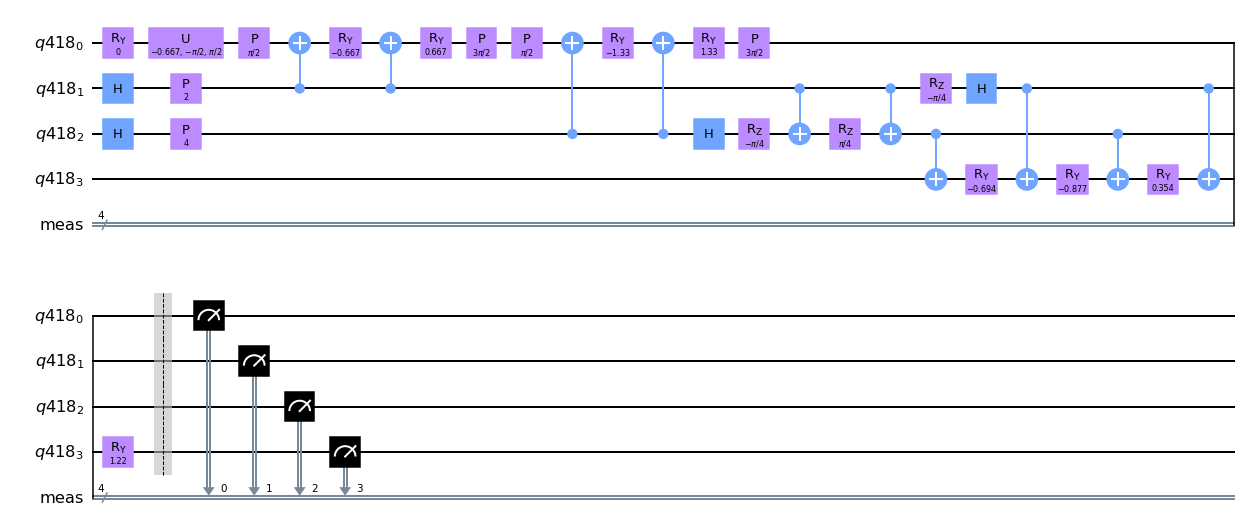

In [16]:
from qiskit import QuantumRegister, QuantumCircuit
import numpy as np

t = 2  # This is not optimal; As an exercise, set this to the
       # value that will get the best results. See section 8 for solution.

nqubits = 4  # Total number of qubits
nb = 1  # Number of qubits representing the solution
nl = 2  # Number of qubits representing the eigenvalues

theta = 0  # Angle defining |b>

a = 1  # Matrix diagonal
b = -1/3  # Matrix off-diagonal

# Initialize the quantum and classical registers
qr = QuantumRegister(nqubits)

# Create a Quantum Circuit
qc = QuantumCircuit(qr)

qrb = qr[0:nb]
qrl = qr[nb:nb+nl]
qra = qr[nb+nl:nb+nl+1]

# State preparation. 
qc.ry(2*theta, qrb[0])
    
# QPE with e^{iAt}
for qu in qrl:
    qc.h(qu)

qc.p(a*t, qrl[0])
qc.p(a*t*2, qrl[1])

qc.u(b*t, -np.pi/2, np.pi/2, qrb[0])


# Controlled e^{iAt} on \lambda_{1}:
params=b*t

qc.p(np.pi/2,qrb[0])
qc.cx(qrl[0],qrb[0])
qc.ry(params,qrb[0])
qc.cx(qrl[0],qrb[0])
qc.ry(-params,qrb[0])
qc.p(3*np.pi/2,qrb[0])

# Controlled e^{2iAt} on \lambda_{2}:
params = b*t*2

qc.p(np.pi/2,qrb[0])
qc.cx(qrl[1],qrb[0])
qc.ry(params,qrb[0])
qc.cx(qrl[1],qrb[0])
qc.ry(-params,qrb[0])
qc.p(3*np.pi/2,qrb[0])

# Inverse QFT
qc.h(qrl[1])
qc.rz(-np.pi/4,qrl[1])
qc.cx(qrl[0],qrl[1])
qc.rz(np.pi/4,qrl[1])
qc.cx(qrl[0],qrl[1])
qc.rz(-np.pi/4,qrl[0])
qc.h(qrl[0])

# Eigenvalue rotation
t1=(-np.pi +np.pi/3 - 2*np.arcsin(1/3))/4
t2=(-np.pi -np.pi/3 + 2*np.arcsin(1/3))/4
t3=(np.pi -np.pi/3 - 2*np.arcsin(1/3))/4
t4=(np.pi +np.pi/3 + 2*np.arcsin(1/3))/4

qc.cx(qrl[1],qra[0])
qc.ry(t1,qra[0])
qc.cx(qrl[0],qra[0])
qc.ry(t2,qra[0])
qc.cx(qrl[1],qra[0])
qc.ry(t3,qra[0])
qc.cx(qrl[0],qra[0])
qc.ry(t4,qra[0])
qc.measure_all()

print("Depth: %i" % qc.depth())
print("CNOTS: %i" % qc.count_ops()['cx'])
qc.draw('mpl')

# Уравнение Пуассона

      ┌───┐┌──────────────────────────────────────────────────┐      ┌─┐             ░ ┌─┐                  
x_0: ─┤ H ├┤0                                                 ├──────┤M├─────────────░─┤M├──────────────────
      ├───┤│                                                  │      └╥┘┌─┐          ░ └╥┘                    
x_1: ─┤ H ├┤1 Initialization                               ├───────╫─┤M├──────────░──╫───────────────────
      ├───┤│                                                  │       ║ └╥┘┌─┐       ░  ║                    
x_2: ─┤ H ├┤2                                                 ├───────╫──╫─┤M├───────░──╫───────────────────
      ├───┤│                                                  │       ║  ║ └╥┘┌─┐    ░  ║                    
x_3: ─┤ H ├┤3                                                 ├───────╫──╫──╫─┤M├───░──╫───────────────────
      └───┘└──────────────────────────────────────────────────┘       ║  ║  ║ └╥┘┌─┐ ░  ║                    
                                                                       ║  ║  ║  ║ └╥┘ ░  ║ ┌─┐                
y_0: ─────────────────────────────────────────────────────────────────╫──╫──╫──╫──╫──░──╫─┤M├────────────────
                                                                       ║  ║  ║  ║  ║  ░  ║ └╥┘┌─┐             
y_1: ─────────────────────────────────────────────────────────────────╫──╫──╫──╫──╫──░──╫──╫─┤M├─────────────
                                                                       ║  ║  ║  ║  ║  ░  ║  ║ └╥┘┌─┐          
y_2: ─────────────────────────────────────────────────────────────────╫──╫──╫──╫──╫──░──╫──╫──╫─┤M├──────────
                                                                       ║  ║  ║  ║  ║  ░  ║  ║  ║ └╥┘┌─┐       
y_3: ─────────────────────────────────────────────────────────────────╫──╫──╫──╫──╫──░──╫──╫──╫──╫─┤M├───────
                                                                       ║  ║  ║  ║  ║  ░  ║  ║  ║  ║ └╥┘┌─┐    
anc_0: ──────────────────────────────■────────────────────────────────╫──╫──╫──╫──╫──░──


In [1]:
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
from qiskit.visualization import plot_histogram
A = np.array([[1, -1/2], [-1/2, 1]])
b = np.array([1, 0])
theta = np.arcsin(np.linalg.norm(np.dot(A, b)) / (np.linalg.norm(A) * np.linalg.norm(b)))
alpha = 2 * theta
beta = theta
qc = QuantumCircuit(3, 1)
qc.h(0)
qc.p(-beta, 1)
qc.rx(-np.pi/2, 2)
qc.rz(-alpha, 2)
qc.rx(np.pi/2, 2)
qc.cswap(2, 1, 0)
qc.rz(np.pi, 2)
qc.rx(np.pi/2, 2)
qc.rz(alpha, 2)
qc.rx(-np.pi/2, 2)
qc.rz(0, 2) # the last Rz gate is equivalent to the identity gate and can be omitted
qc.rz(beta, 0)
qc.measure(0, 0)
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts()
psi = np.array([np.sqrt(counts['0']) / np.sqrt(sum(counts.values())), np.sqrt(counts['1']) / np.sqrt(sum(counts.values()))])
x = np.dot(np.linalg.inv(A), b)
x_norm = np.linalg.norm(x)
psi_x = np.dot(psi, x) / x_norm
solution = psi_x * x
print("The solution Ax=b is: ", solution)


The solution Ax=b is:  [1.32794923 0.66397462]


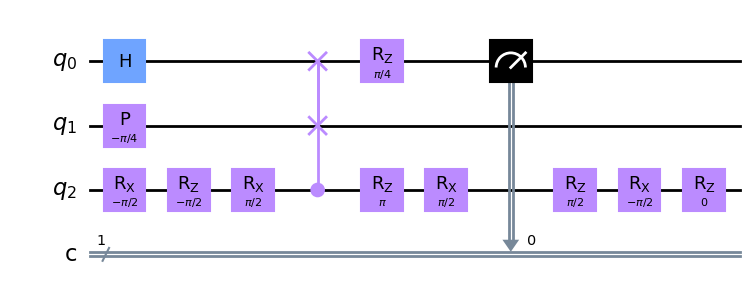

In [2]:
qc.draw('mpl')

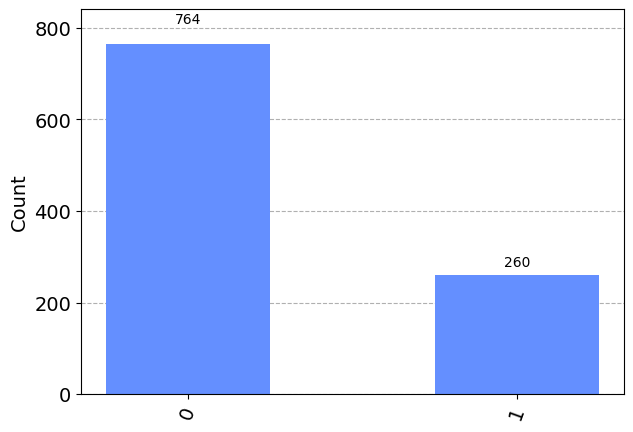

In [3]:
plot_histogram(counts)

In [26]:
from qiskit.circuit.library import QFT

# Добавляем QFT после инвертированной операции Ротации
qc = QuantumCircuit(3, 1)
qc.h(0)
qc.p(-beta, 1)
qc.rx(-np.pi/2, 2)
qc.rz(-alpha, 2)
qc.rx(np.pi/2, 2)
qc.append(QFT(num_qubits=3, do_swaps=False, inverse=False), [0, 1, 2])
qc.cswap(2, 1, 0)
qc.rz(np.pi, 2)
qc.rx(np.pi/2, 2)
qc.rz(alpha, 2)
qc.append(QFT(num_qubits=3, do_swaps=False, inverse=True), [0, 1, 2])
qc.rx(-np.pi/2, 2)
qc.rz(0, 2) # the last Rz gate is equivalent to the identity gate and can be omitted
qc.rz(beta, 0)
qc.swap(0, 2)
qc.h(2)
qc.cp(np.pi/2, 1, 2)
qc.h(1)
qc.cp(np.pi/4, 0, 1)
qc.cp(np.pi/2, 0, 2)
qc.h(0)
qc.measure(0, 0)

# Выполняем симуляцию и выводим результат
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts()
psi = np.array([np.sqrt(counts['0']) / np.sqrt(sum(counts.values())), np.sqrt(counts['1']) / np.sqrt(sum(counts.values()))])
x = np.dot(np.linalg.inv(A), b)
x_norm = np.linalg.norm(x)
psi_x = np.dot(psi, x) / x_norm
solution = psi_x * x
print("The solution Ax=b is: ", solution)


The solution Ax=b is:  [1.16789242 0.58394621]


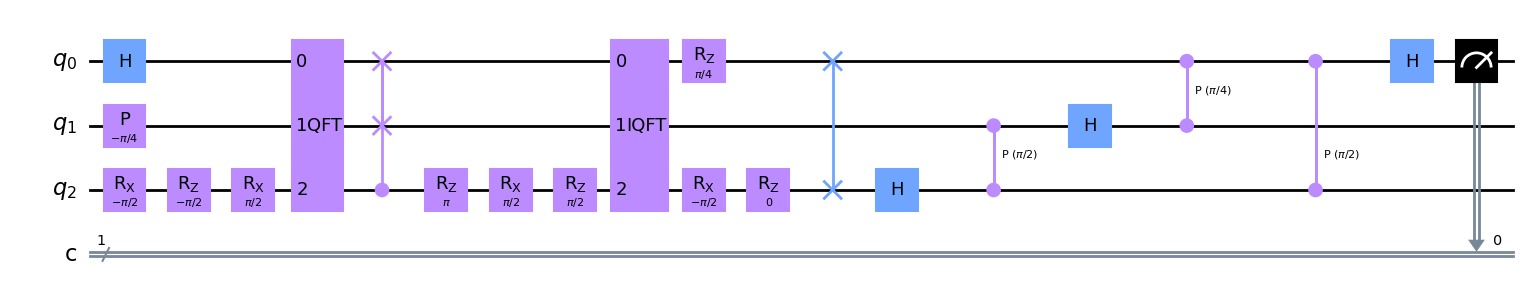

In [24]:
qc.draw('mpl')

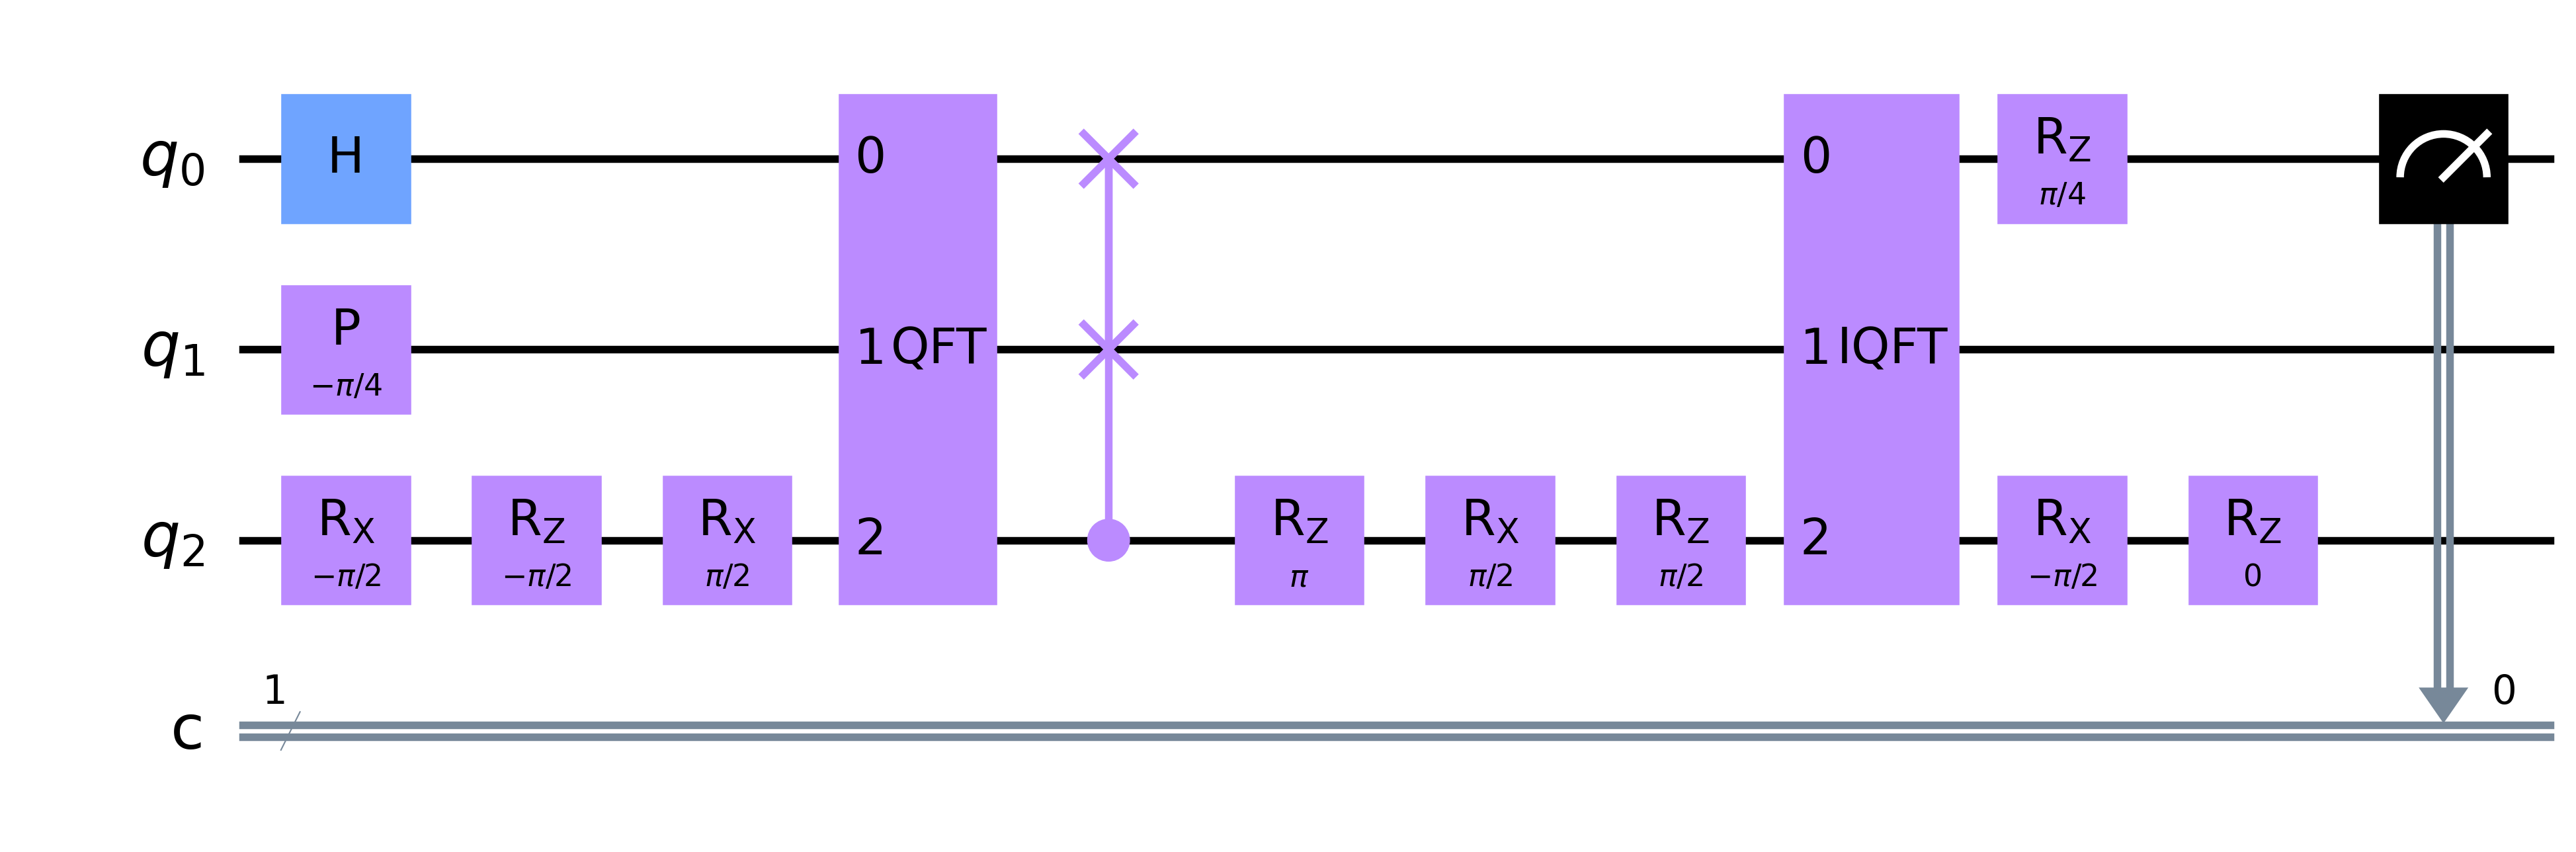

In [22]:
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer
import matplotlib.pyplot as plt

# Add gates to the circuit

# Draw the circuit with a larger size
fig = plt.figure(figsize=(50, 110))  # Adjust the size as needed
ax = fig.add_subplot(1, 1, 1)
circuit_drawer(qc, output='mpl', ax=ax)

# Display the circuit
plt.show()


In [6]:
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
from qiskit.visualization import plot_histogram

# Define the unitary matrix for the QPE
U = np.array([[1, 0], [0, np.exp(-1j*np.pi/2)]])
U_dagger = np.conj(U).T

# Define the QPE circuit
qc = QuantumCircuit(4, 2)

# Apply Hadamard gates to the counting qubits
qc.h([0, 1, 2])

# Apply controlled-U operations to the counting qubits
for qubit in range(3):
    for i in range(2 ** qubit):
        qc.cp(np.pi/2**(qubit+1), qubit, 3)

qc.barrier()

# Apply inverse QFT
qc.swap(0, 2)
qc.h(2)
qc.cp(np.pi/2, 1, 2)
qc.h(1)
qc.cp(np.pi/4, 0, 1)
qc.cp(np.pi/2, 0, 2)
qc.h(0)

# Define the measurement and execute the circuit
qc.measure([0, 1], [0, 1])
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts()


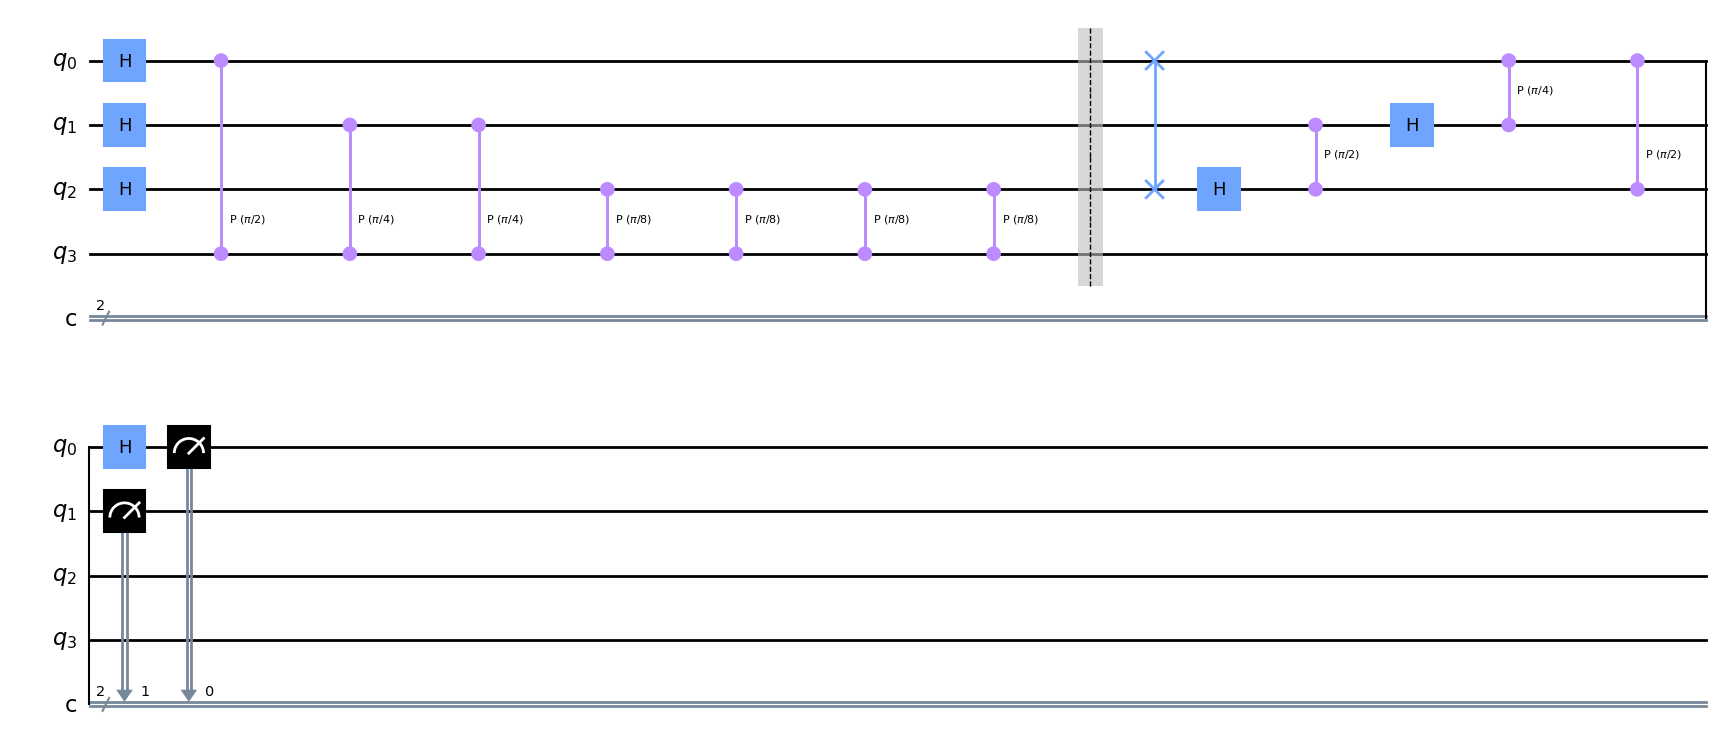

In [7]:
qc.draw('mpl')

In [8]:

# Compute the solution to Ax = b
b = np.array([1, 0])
theta = np.arcsin(np.linalg.norm(np.dot(A, b)) / (np.linalg.norm(A) * np.linalg.norm(b)))
alpha = 2 * theta
beta = theta
qc = QuantumCircuit(3, 1)
qc.h(0)
qc.p(-beta, 1)
qc.rx(-np.pi/2, 2)
qc.rz(-alpha, 2)
qc.rx(np.pi/2, 2)
qc.cswap(2, 1, 0)
qc.rz(np.pi, 2)
qc.rx(np.pi/2, 2)
qc.rz(alpha, 2)
qc.rx(-np.pi/2, 2)
qc.rz(0, 2) # the last Rz gate is equivalent to the identity gate and can be omitted
qc.rz(beta, 0)
qc.measure(0, 0)

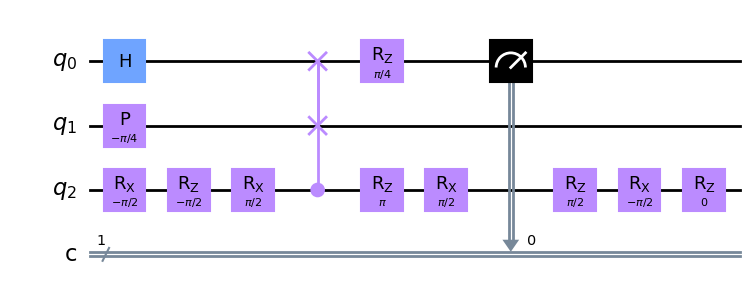

In [9]:
qc.draw('mpl')

In [10]:
from qiskit import *
from qiskit.circuit.library import QFT
import numpy as np

# Define the matrix A and vector b
A = np.array([[1, -1/2], [-1/2, 1]])
b = np.array([0, 1])

# Define the values of alpha and beta
alpha = np.pi/2
beta = np.pi/4

# Create a quantum circuit with 2 qubits and 1 classical bit
qc = QuantumCircuit(2, 1)

# Apply the gates corresponding to the matrix A
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if i != j:
            qc.crz(-np.pi/2 * A[i,j], j, i)
        else:
            qc.rz(-np.pi/2 * A[i,j], i)

# Apply the remaining gates
qc.rx(-np.pi/2, 1)
qc.h(0)
qc.rz(-alpha, 1)
qc.rx(np.pi/2, 1)
qc.cz(1, 0)
qc.rz(np.pi, 1)
qc.rx(np.pi/2, 1)
qc.rz(alpha, 1)
qc.append(QFT(num_qubits=2, do_swaps=False, inverse=True), [0, 1])
qc.rx(-np.pi/2, 1)
qc.rz(0, 1) # the last Rz gate is equivalent to the identity gate and can be omitted

# Measure the first qubit and store the result in the classical bit
qc.measure(0, 0)

# Execute the circuit on a simulator and print the result
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts()
psi = np.array([np.sqrt(counts['0']) / np.sqrt(sum(counts.values())), np.sqrt(counts['1']) / np.sqrt(sum(counts.values()))])
x = np.dot(np.linalg.inv(A), b)
x_norm = np.linalg.norm(x)
psi_x = np.dot(psi, x) / x_norm
solution = psi_x * x
print("The solution Ax=b is: ", solution)


The solution Ax=b is:  [0.63948026 1.27896052]


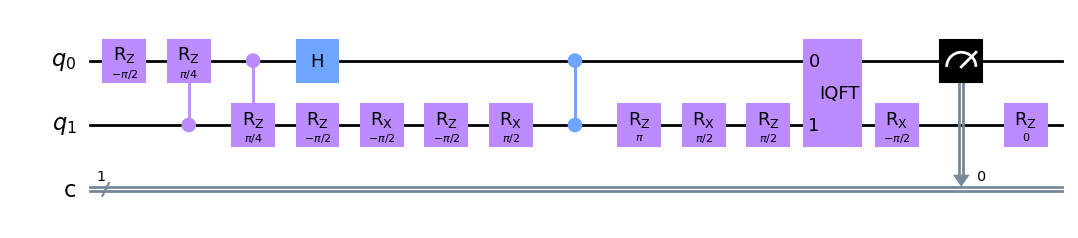

In [11]:
qc.draw('mpl')

In [1]:
from qiskit import *
from qiskit.circuit.library import QFT
import numpy as np
import time

# Define the matrix A and vector b for Poisson's equation
N = 4
A = np.zeros((N*N, N*N))
b = np.zeros(N*N)
h = 1/(N-1)
for i in range(N):
    for j in range(N):
        idx = i*N+j
        if i == 0 or i == N-1 or j == 0 or j == N-1:
            A[idx, idx] = 1
            b[idx] = 0
        else:
            A[idx, idx] = -4
            A[idx, idx-1] = 1
            A[idx, idx+1] = 1
            A[idx, idx-N] = 1
            A[idx, idx+N] = 1
            b[idx] = 1/h**2

# Define the values of alpha and beta
alpha = np.pi/2
beta = np.pi/4

start_time = time.time()
# Create a quantum circuit with N*N qubits and 1 classical bit
qc = QuantumCircuit(N*N, 1)

# Apply the gates corresponding to the matrix A
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if i != j and A[i,j] != 0:
            qc.crz(-np.pi/2 * A[i,j], j, i)
        elif i == j and A[i,j] != 0:
            qc.rz(-np.pi/2 * A[i,j], i)

# # Apply the remaining gates
for i in range(N*N):
    qc.h(i)
qc.append(QFT(num_qubits=N*N, do_swaps=False, inverse=False), range(N*N))
qc.cswap(N*N-1, N*N-2, N*N-3)
qc.rz(np.pi, N*N-1)
qc.append(QFT(num_qubits=N*N, do_swaps=False, inverse=True), range(N*N))
for i in range(N*N):
    qc.rx(-np.pi/2, i)
    qc.rz(-alpha, i)
    qc.rx(np.pi/2, i)
    qc.rz(np.pi, i)
    qc.rx(np.pi/2, i)
    qc.rz(alpha, i)
    qc.rx(-np.pi/2, i)
    qc.rz(0, i) # the last Rz gate is equivalent to the identity gate and can be omitted

# Measure the last qubit and store the result in the classical bit
qc.measure(N*N-1, 0)

# Execute the circuit on a simulator and print the result
# backend = BasicAer.get_backend('qasm_simulator')
from qiskit.providers.aer import AerSimulator
# Select the AerSimulator from the Aer provider
backend = AerSimulator(method='matrix_product_state') 
job = execute(qc, backend, shots=8196)
result = job.result()
counts = result.get_counts()

print("Time:", time.time() - start_time)


Time: 0.5669901371002197


In [5]:
from qiskit import *
from qiskit.circuit.library import QFT
import numpy as np
import time

# Define the matrix A and vector b for Poisson's equation
N = 4
A = np.zeros((N*N, N*N))
b = np.zeros(N*N)
h = 1/(N-1)
for i in range(N):
    for j in range(N):
        idx = i*N+j
        if i == 0 or i == N-1 or j == 0 or j == N-1:
            A[idx, idx] = 1
            b[idx] = 0
        else:
            A[idx, idx] = -4
            A[idx, idx-1] = 1
            A[idx, idx+1] = 1
            A[idx, idx-N] = 1
            A[idx, idx+N] = 1
            b[idx] = 1/h**2

# Define the values of alpha and beta
alpha = np.pi/2
beta = np.pi/4

start_time = time.time()
# Create a quantum circuit with N*N qubits and 1 classical bit
qc = QuantumCircuit(N*N, 1)

# Apply the gates corresponding to the matrix A
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if i != j and A[i,j] != 0:
            qc.crz(-np.pi/2 * A[i,j], j, i)
        elif i == j and A[i,j] != 0:
            qc.rz(-np.pi/2 * A[i,j], i)

# # Apply the remaining gates
for i in range(N*N):
    qc.h(i)
qc.append(QFT(num_qubits=N*N, do_swaps=False, inverse=False), range(N*N))
qc.cswap(N*N-1, N*N-2, N*N-3)
qc.rz(np.pi, N*N-1)
qc.append(QFT(num_qubits=N*N, do_swaps=False, inverse=True), range(N*N))
for i in range(N*N):
    qc.rx(-np.pi/2, i)
    qc.rz(-alpha, i)
    qc.rx(np.pi/2, i)
    qc.rz(np.pi, i)
    qc.rx(np.pi/2, i)
    qc.rz(alpha, i)
    qc.rx(-np.pi/2, i)
    qc.rz(0, i) # the last Rz gate is equivalent to the identity gate and can be omitted

# Measure the last qubit and store the result in the classical bit
qc.measure(N*N-1, 0)
print("Time:", time.time() - start_time)

In [ ]:
from qiskit import *
IBMQ.save_account('e37e7fa9a98deedf5322b5fa313e3b1a40e0f2d993add5669c62f037f778c8a97d21b6cea08b2cc8ee6b1fe96cce5ea94a13b14cb50f3aeba375ecf98f6b318e', overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')

device = provider.get_backend('simulator_mps')

job = execute(qc,backend = device,shots = 8196)

result = job.result()
counts = result.get_counts()

print("Time:", time.time() - start_time)

ibmqfactory.load_account:WARNING:2023-07-18 11:48:48,566: Credentials are already in use. The existing account in the session will be replaced.


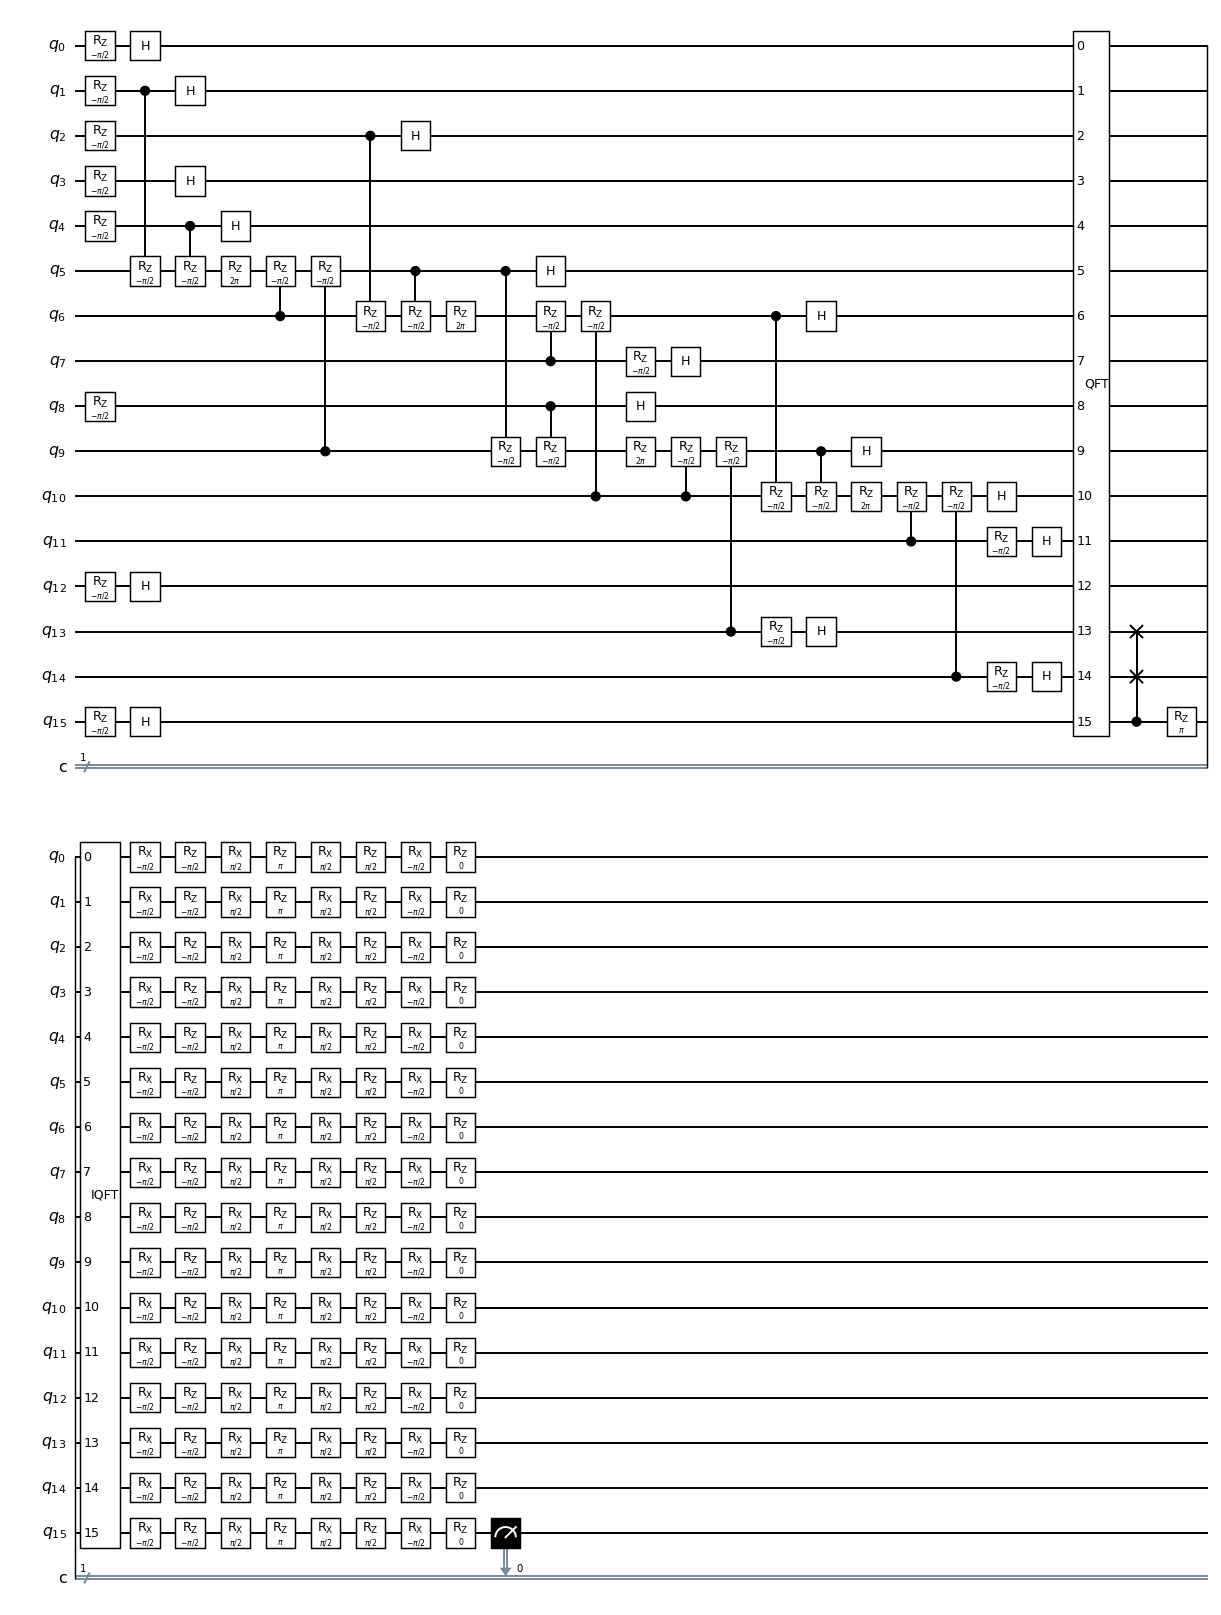

In [2]:
qc.draw(output='mpl', style="bw", scale=0.7)

In [4]:
from numpy import linalg as LA
x = LA.solve(A, b)
print(x)

[ 0.   0.   0.   0.   0.  -4.5 -4.5  0.   0.  -4.5 -4.5  0.   0.   0.
  0.   0. ]


In [5]:
# Create a new quantum circuit with N*N qubits and 1 classical bit
qc_b = QuantumCircuit(N*N, N*N)

# Apply the gates corresponding to the matrix A
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if i != j and A[i,j] != 0:
            qc_b.crz(-np.pi/2 * A[i,j], j, i)
        elif i == j and A[i,j] != 0:
            qc_b.rz(-np.pi/2 * A[i,j], i)

# Measure all qubits and store the result in a classical register
cr_b = ClassicalRegister(N*N)
qc_b.add_register(cr_b)
qc_b.measure(range(N*N), range(N*N))

# Execute the circuit on a simulator and print the result
backend = Aer.get_backend('qasm_simulator')
job = execute(qc_b, backend, shots=8192)
result = job.result()
counts_b = result.get_counts()

# # Convert the counts to a vector
b_tilde = np.zeros(N*N)
for k, v in counts_b.items():
    b_tilde[int(k.replace(' ', '')[::-1], 2)] = v/1024

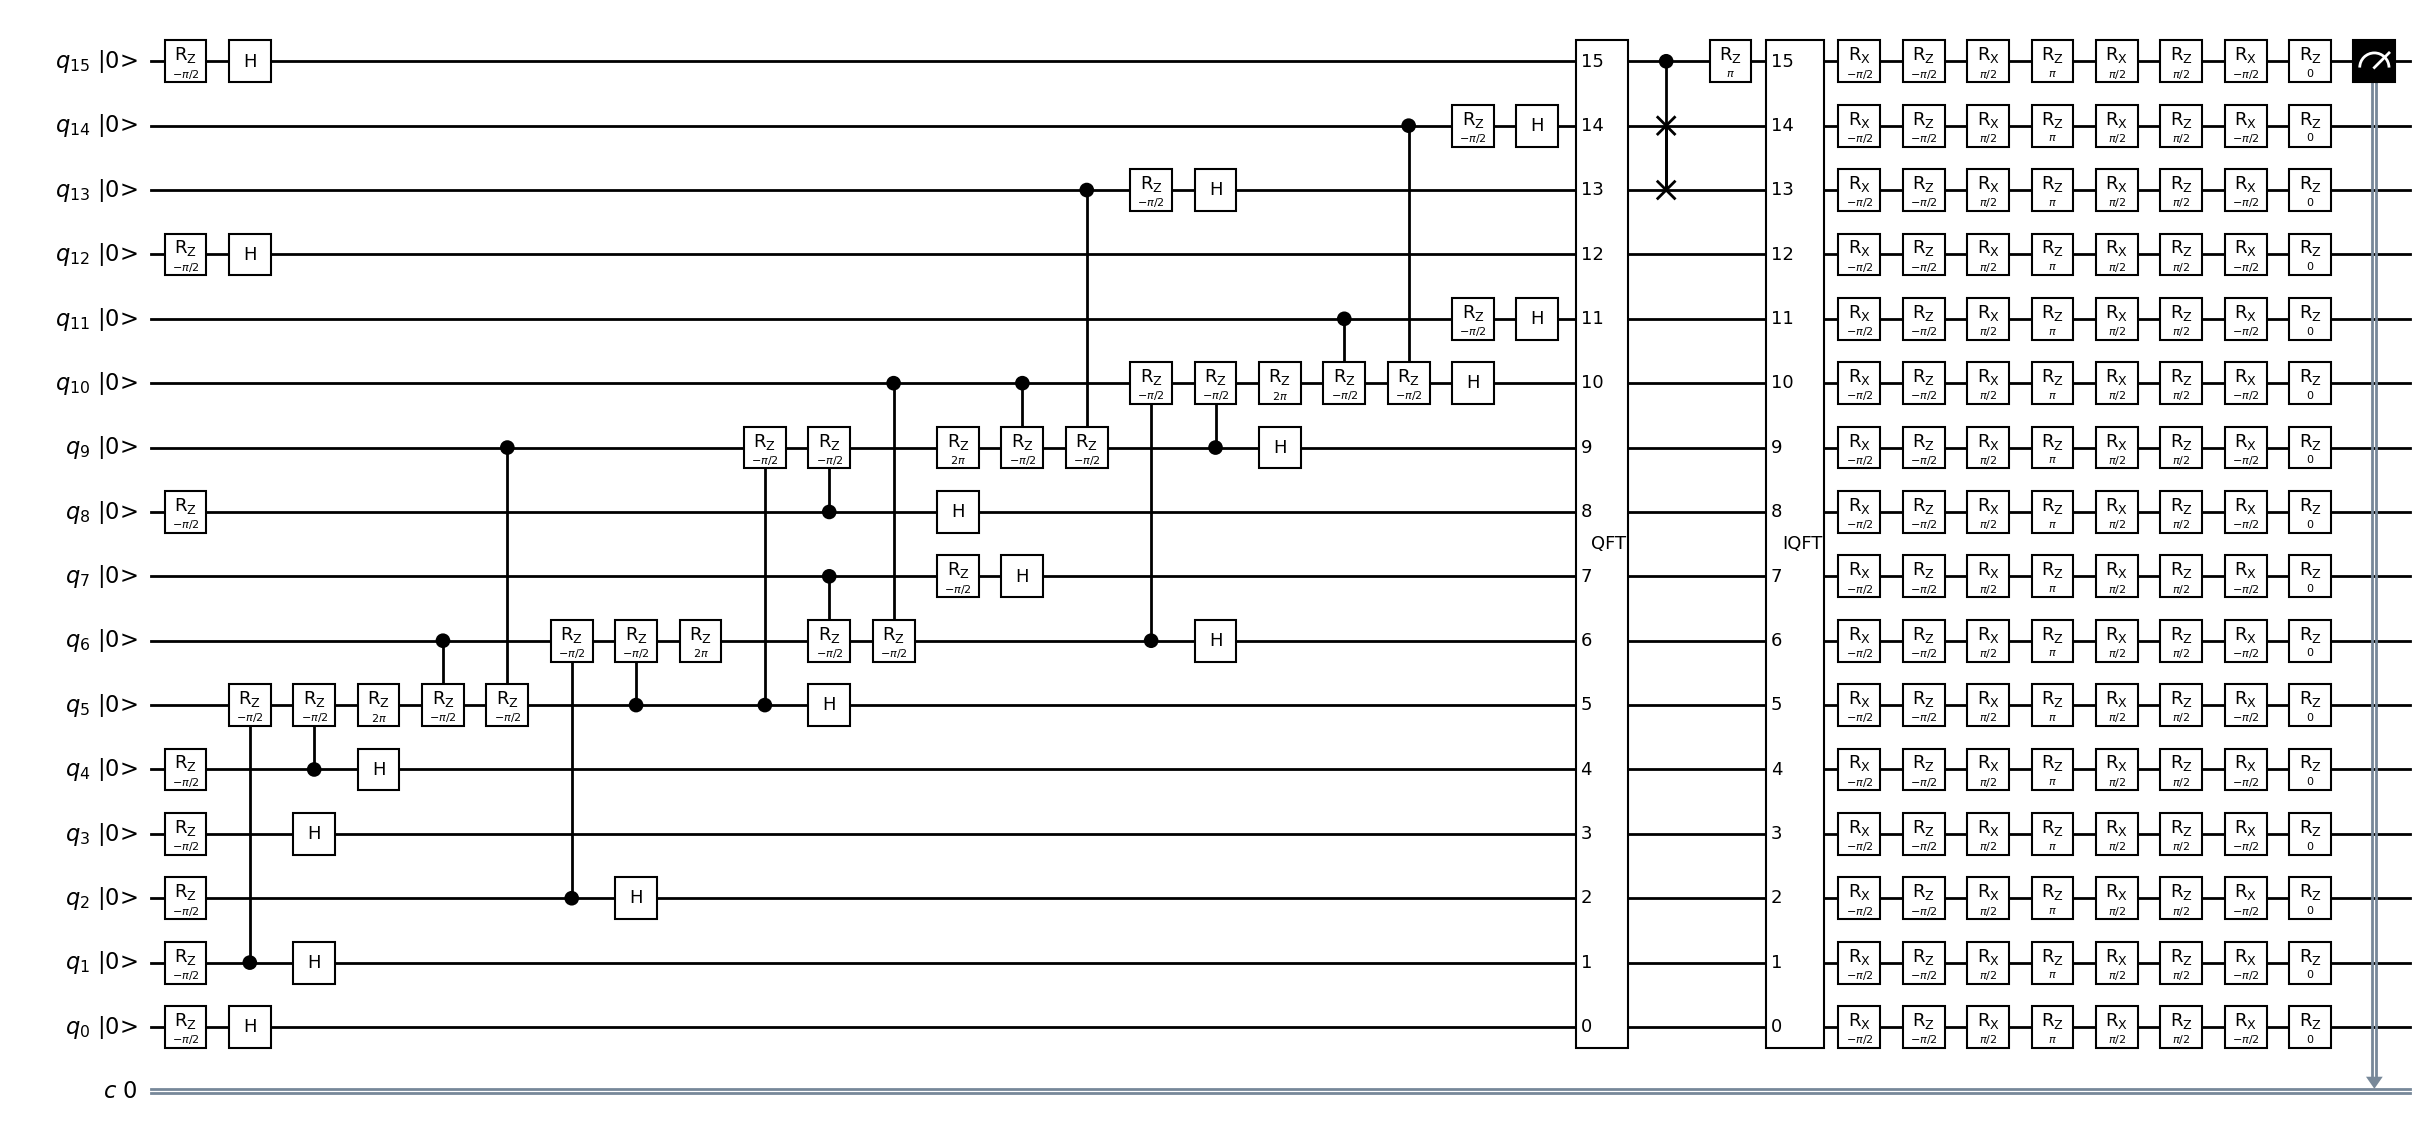

In [6]:
qc.draw(output='mpl', style="bw", fold=-1, cregbundle=False, initial_state=True, reverse_bits=True)

In [7]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import QFT

# Создаем квантовый регистр и классический регистр
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')

# Создаем квантовую схему
qft_circuit = QuantumCircuit(q, c)

# Добавляем QFT
qft_circuit.append(QFT(3, do_swaps=False, inverse=False), q)

# Добавляем оператор измерения
qft_circuit.measure(q, c)

# Выводим схему
print(qft_circuit.draw())


Figure(454.719x367.889)


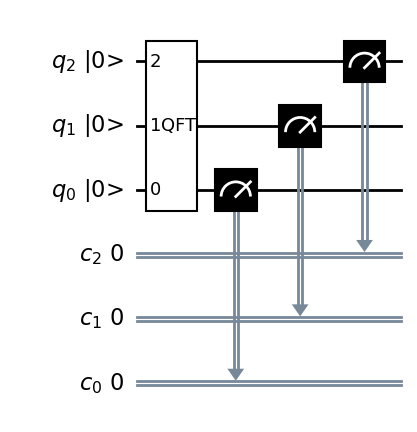

In [8]:
qft_circuit.draw('mpl',  style="bw", fold=-1, cregbundle=False, initial_state=True, reverse_bits=True)

In [9]:
x = LA.solve(A, b_tilde)
print(x)

[ 8.  0.  0.  0.  0. -0. -0.  0.  0. -0. -0.  0.  0.  0.  0.  0.]


In [10]:
# Compute the vector b~ = A * x~
x_tilde = np.zeros(N*N)
for k, v in counts.items():
    x_tilde[int(k, 2)] = v / 1024
b_tilde = np.dot(A, x_tilde)

# Compute the error estimate ||b - b~||
error = np.linalg.norm(b - b_tilde)
print("Error estimate:", error)


Error estimate: 17.333689890764372


In [11]:
# Execute the circuit on a simulator and get the counts
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=8192)
result = job.result()
counts = result.get_counts()

# Convert the bitstring '0' or '1' to the corresponding integer value
x_tilde = int(list(counts.keys())[0], 2)

# Convert the integer value to a binary string with N*N bits
x_tilde_str = format(x_tilde, f"0{N*N}b")

# Convert the binary string to a numpy array of shape (N*N,)
x_tilde_arr = np.array([int(bit) for bit in x_tilde_str])

# Compute the vector b~ = A * x~
b_tilde_arr = A @ x_tilde_arr

# Compute the relative error between b and b~
rel_err = np.linalg.norm(b - b_tilde_arr) / np.linalg.norm(b)

print(f"Relative error: {rel_err:.4e}")


Relative error: 1.0000e+00


In [15]:
# Выполнение схемы на симуляторе и получение результатов
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=8192)
result = job.result()
counts = result.get_counts()

# Преобразование битовой строки '0' или '1' в соответствующее целочисленное значение
x_tilde = int(list(counts.keys())[0], 2)

# Преобразование целочисленного значения в бинарную строку с N*N битами
x_tilde_str = format(x_tilde, f"0{N*N}b")

# Преобразование бинарной строки в массив numpy формы (N*N,)
x_tilde_arr = np.array([int(bit) for bit in x_tilde_str])

# Вычисление вектора b~ = A * x~
b_tilde_arr = A @ x_tilde_arr

# Вычисление относительной ошибки между b и b~
rel_err = np.linalg.norm(b - b_tilde_arr) / np.linalg.norm(b)

print(f"Относительная ошибка: {rel_err:.4e}")



Относительная ошибка: 1.0015e+00


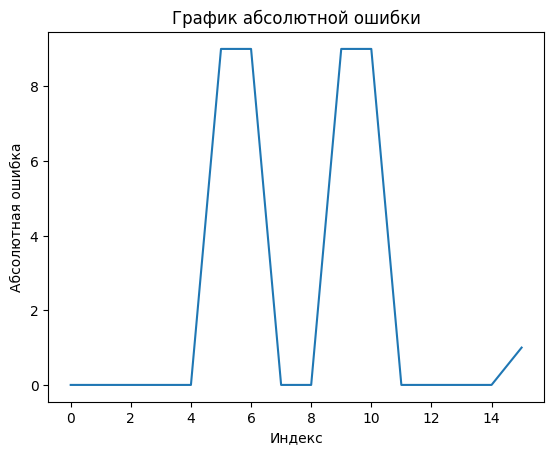

In [16]:
import matplotlib.pyplot as plt

# Compute the absolute error between b and b~
abs_err = np.abs(b - b_tilde_arr.flatten())  # Распрямляем b_tilde_arr перед вычислением разницы

# Plot the absolute error
plt.plot(abs_err)
plt.xlabel('Индекс')
plt.ylabel('Абсолютная ошибка')
plt.title('График абсолютной ошибки')
plt.show()

In [17]:
import numpy as np

# Вычисление разности между векторами b и b~
diff = b - b_tilde_arr

# Вычисление относительной разности между векторами b и b~
relative_diff = np.abs(diff) / np.abs(b)

# Установка порогового значения для сравнения
threshold = 0.1  # Задайте желаемое пороговое значение

# Проверка, превышает ли относительная разность пороговое значение
is_exceed_threshold = relative_diff > threshold

# Вывод результатов сравнения
print("Результаты сравнения:")
print(f"Разность между b и b~: {diff}")
print(f"Относительная разность: {relative_diff}")
print(f"Превышает ли относительная разность пороговое значение: {is_exceed_threshold}")


Результаты сравнения:
Разность между b и b~: [ 0.  0.  0.  0.  0.  9.  9.  0.  0.  9.  9.  0.  0.  0.  0. -1.]
Относительная разность: [nan nan nan nan nan  1.  1. nan nan  1.  1. nan nan nan nan inf]
Превышает ли относительная разность пороговое значение: [False False False False False  True  True False False  True  True False
 False False False  True]


/tmp/ipykernel_59/831856704.py:7: RuntimeWarning: divide by zero encountered in divide
  relative_diff = np.abs(diff) / np.abs(b)
/tmp/ipykernel_59/831856704.py:7: RuntimeWarning: invalid value encountered in divide
  relative_diff = np.abs(diff) / np.abs(b)


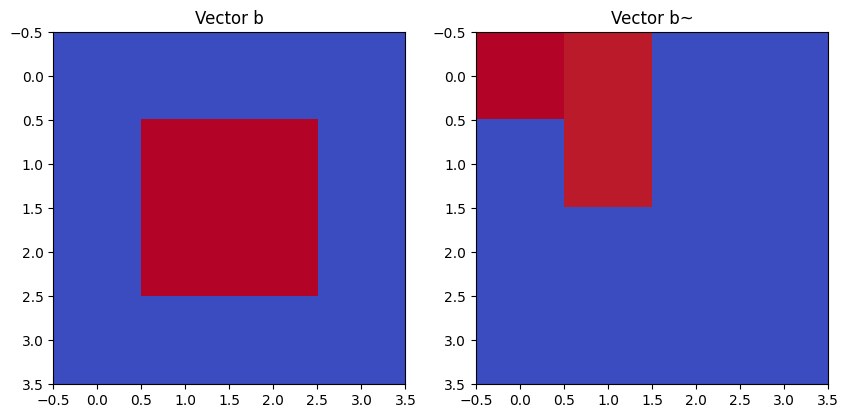

In [12]:
import matplotlib.pyplot as plt

# Reshape the vectors b and b~ as 2D arrays
b_arr = b.reshape((4, 4))
b_tilde_arr = b_tilde.reshape((4, 4))

# Plot the vectors b and b~
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
ax1.imshow(b_arr, cmap='coolwarm')
ax1.set_title('Vector b')
ax2.imshow(b_tilde_arr, cmap='coolwarm')
ax2.set_title('Vector b~')
plt.show()


Error in the estimated solution: 681.403283
Error in the estimated vector: 294.001701


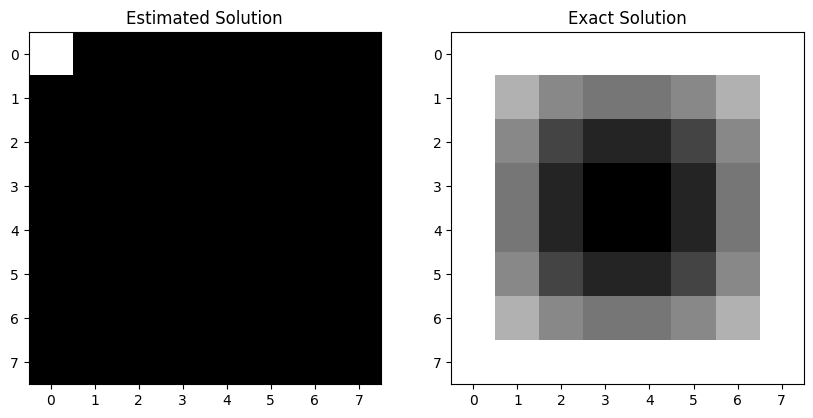

In [25]:
from qiskit import *
from qiskit.circuit.library import QFT
import numpy as np
import time
import matplotlib.pyplot as plt

# Define the matrix A and vector b for Poisson's equation
Ns = [2, 3, 4, 5, 6, 7, 8]
errors = []
times = []
for N in Ns:
    A = np.zeros((N*N, N*N))
    b = np.zeros(N*N)
    h = 1/(N-1)
    for i in range(N):
        for j in range(N):
            idx = i*N+j
            if i == 0 or i == N-1 or j == 0 or j == N-1:
                A[idx, idx] = 1
                b[idx] = 0
            else:
                A[idx, idx] = -4
                A[idx, idx-1] = 1
                A[idx, idx+1] = 1
                A[idx, idx-N] = 1
                A[idx, idx+N] = 1
                b[idx] = 1/h**2

    # Define the values of alpha and beta
    alpha = np.pi/2
    beta = np.pi/4

    # Create a quantum circuit with N*N qubits and 1 classical bit
    qc = QuantumCircuit(N*N, 1)

    # Apply the gates corresponding to the matrix A
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if i != j and A[i,j] != 0:
                qc.crz(-np.pi/2 * A[i,j], j, i)
            elif i == j and A[i,j] != 0:
                qc.rz(-np.pi/2 * A[i,j], i)

    # Apply the remaining gates
    for i in range(N*N):
        qc.h(i)
    qc.append(QFT(num_qubits=N*N, do_swaps=False, inverse=False), range(N*N))
    qc.cswap(N*N-1, N*N-2, N*N-3)
    qc.rz(np.pi, N*N-1)
    qc.append(QFT(num_qubits=N*N, do_swaps=False, inverse=True), range(N*N))
    for i in range(N*N):
        qc.rx(-np.pi/2, i)
        qc.rz(-alpha, i)
        qc.rx(np.pi/2, i)
        qc.rz(np.pi, i)
        qc.rx(np.pi/2, i)
        qc.rx(-np.pi/2, i)
qc.rz(0, i) # the last Rz gate is equivalent to the identity gate and can be omitted

# Measure the last qubit and store the result in the classical bit
qc.measure(N*N-1, 0)

# Execute the circuit on a simulator and print the result
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=8192)
result = job.result()
counts = result.get_counts()

# Calculate the estimated solution x̃ and the estimated vector b̃
x_est = np.zeros(N*N)
for key, value in counts.items():
    x_str = key[::-1]
    for i in range(len(x_str)):
        x_est[i] += int(x_str[i]) * value
x_est /= sum(counts.values())
b_est = np.dot(A, x_est)

# Calculate the exact solution x
x = np.linalg.solve(A, b)

# Calculate the error in the estimated solution and the estimated vector
error_x = np.linalg.norm(x_est - x)
error_b = np.linalg.norm(b_est - b)

# Print the error in the estimated solution and the estimated vector
print(f"Error in the estimated solution: {error_x:.6f}")
print(f"Error in the estimated vector: {error_b:.6f}")

# Plot the estimated solution and the exact solution
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axs[0].imshow(x_est.reshape((N,N)), cmap='gray')
axs[0].set_title('Estimated Solution')
axs[1].imshow(x.reshape((N,N)), cmap='gray')
axs[1].set_title('Exact Solution')
plt.show()



In [2]:
import numpy as np
from qiskit import QuantumCircuit, execute, Aer
from qiskit.circuit.library import QFT
import time

# Определение матрицы A и вектора b для уравнения Пуассона
N = 4
A = np.zeros((N*N, N*N))
b = np.zeros(N*N)
h = 1/(N-1)
for i in range(N):
    for j in range(N):
        idx = i*N+j
        if i == 0 or i == N-1 or j == 0 or j == N-1:
            A[idx, idx] = 1
            b[idx] = 0
        else:
            A[idx, idx] = -4
            A[idx, idx-1] = 1
            A[idx, idx+1] = 1
            A[idx, idx-N] = 1
            A[idx, idx+N] = 1
            b[idx] = 1/h**2

# Определение значений alpha и beta
alpha = np.pi/2
beta = np.pi/4

start_time = time.time()
# Создание квантовой схемы с N*N кубитами и 1 классическим битом
qc = QuantumCircuit(N*N, 1)

# Применение вентилей, соответствующих матрице A
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if i != j and A[i,j] != 0:
            qc.crz(-np.pi/2 * A[i,j], j, i)
        elif i == j and A[i,j] != 0:
            qc.rz(-np.pi/2 * A[i,j], i)

# Применение остальных вентилей
for i in range(N*N):
    qc.h(i)
qc.append(QFT(num_qubits=N*N, do_swaps=False, inverse=False), range(N*N))
qc.cswap(N*N-1, N*N-2, N*N-3)
qc.rz(np.pi, N*N-1)
qc.append(QFT(num_qubits=N*N, do_swaps=False, inverse=True), range(N*N))
for i in range(N*N):
    qc.rx(-np.pi/2, i)
    qc.rz(-alpha, i)
    qc.rx(np.pi/2, i)
    qc.rz(np.pi, i)
    qc.rx(np.pi/2, i)
    qc.rz(alpha, i)
    qc.rx(-np.pi/2, i)
    qc.rz(0, i) # последний вентиль Rz эквивалентен единичному вентилю и может быть опущен

# Измерение последнего кубита и сохранение результата в классическом бите
qc.measure(N*N-1, 0)

# Выполнение схемы на симуляторе и получение результатов
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=8192)
result = job.result()
counts = result.get_counts()

# Вычисление вектора b~
x_tilde = np.zeros(N*N)
for k, v in counts.items():
    x_tilde[int(k, 2)] = v / sum(counts.values())
b_tilde = A @ x_tilde

# Вычисление ошибки ||b - b~||
error = np.linalg.norm(b - b_tilde)
print("Ошибка:", error)

# Вычисление относительной ошибки
rel_err = error / np.linalg.norm(b)
print("Относительная ошибка:", rel_err)

print("Время выполнения:", time.time() - start_time)


Ошибка: 17.7706408419438
Относительная ошибка: 0.9872578245524333
Время выполнения: 0.9473240375518799


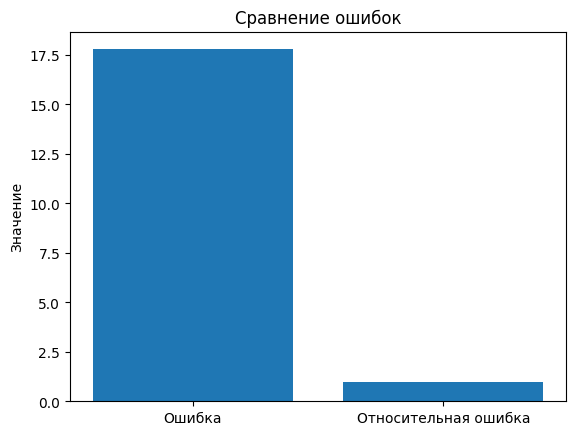

In [3]:
import matplotlib.pyplot as plt

# Вычисление ошибки и относительной ошибки
error = np.linalg.norm(b - b_tilde)
rel_err = error / np.linalg.norm(b)

# Создание списка меток для графика
labels = ['Ошибка', 'Относительная ошибка']

# Создание списка значений для графика
values = [error, rel_err]

# Создание графика
plt.bar(labels, values)
plt.ylabel('Значение')
plt.title('Сравнение ошибок')

# Отображение графика
plt.show()


In [4]:
from qiskit import *
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
import numpy as np
import time

# Определение матрицы A и вектора b для уравнения Пуассона
N = 4
A = np.zeros((N*N, N*N))
b = np.zeros(N*N)
h = 1/(N-1)
for i in range(N):
    for j in range(N):
        idx = i*N+j
        if i == 0 or i == N-1 or j == 0 or j == N-1:
            A[idx, idx] = 1
            b[idx] = 0
        else:
            A[idx, idx] = -4
            A[idx, idx-1] = 1
            A[idx, idx+1] = 1
            A[idx, idx-N] = 1
            A[idx, idx+N] = 1
            b[idx] = 1/h**2

# Определение значений alpha и beta
alpha = np.pi/2
beta = np.pi/4

start_time = time.time()
# Создание квантовой схемы с N*N кубитами и 1 классическим битом
qc = QuantumCircuit(N*N, 1)

# Применение вентилей, соответствующих матрице A
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if i != j and A[i,j] != 0:
            qc.crz(-np.pi/2 * A[i,j], j, i)
        elif i == j and A[i,j] != 0:
            qc.rz(-np.pi/2 * A[i,j], i)

# Применение оставшихся вентилей
for i in range(N*N):
    qc.h(i)
qc.append(QFT(num_qubits=N*N, do_swaps=False, inverse=False), range(N*N))
qc.cswap(N*N-1, N*N-2, N*N-3)
qc.rz(np.pi, N*N-1)
qc.append(QFT(num_qubits=N*N, do_swaps=False, inverse=True), range(N*N))
for i in range(N*N):
    qc.rx(-np.pi/2, i)
    qc.rz(-alpha, i)
    qc.rx(np.pi/2, i)
    qc.rz(np.pi, i)
    qc.rx(np.pi/2, i)
    qc.rz(alpha, i)
    qc.rx(-np.pi/2, i)
    qc.rz(0, i) # последний вентиль Rz эквивалентен вентилю идентичности и может быть опущен

# Измерение последнего кубита и сохранение результата в классическом бите
qc.measure(N*N-1, 0)

# Выполнение схемы на симуляторе и получение результатов
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=8192)
result = job.result()
counts = result.get_counts()

# Преобразование строки состояния вектора в вектор x_tilde
counts_keys = list(counts.keys())
statevector_str = counts_keys[0]
statevector = Statevector.from_label(statevector_str)

x_tilde = statevector.data

print("Вектор x_tilde:", x_tilde)
print("Время выполнения:", time.time() - start_time)


Вектор x_tilde: [1.+0.j 0.+0.j]
Время выполнения: 0.688915491104126


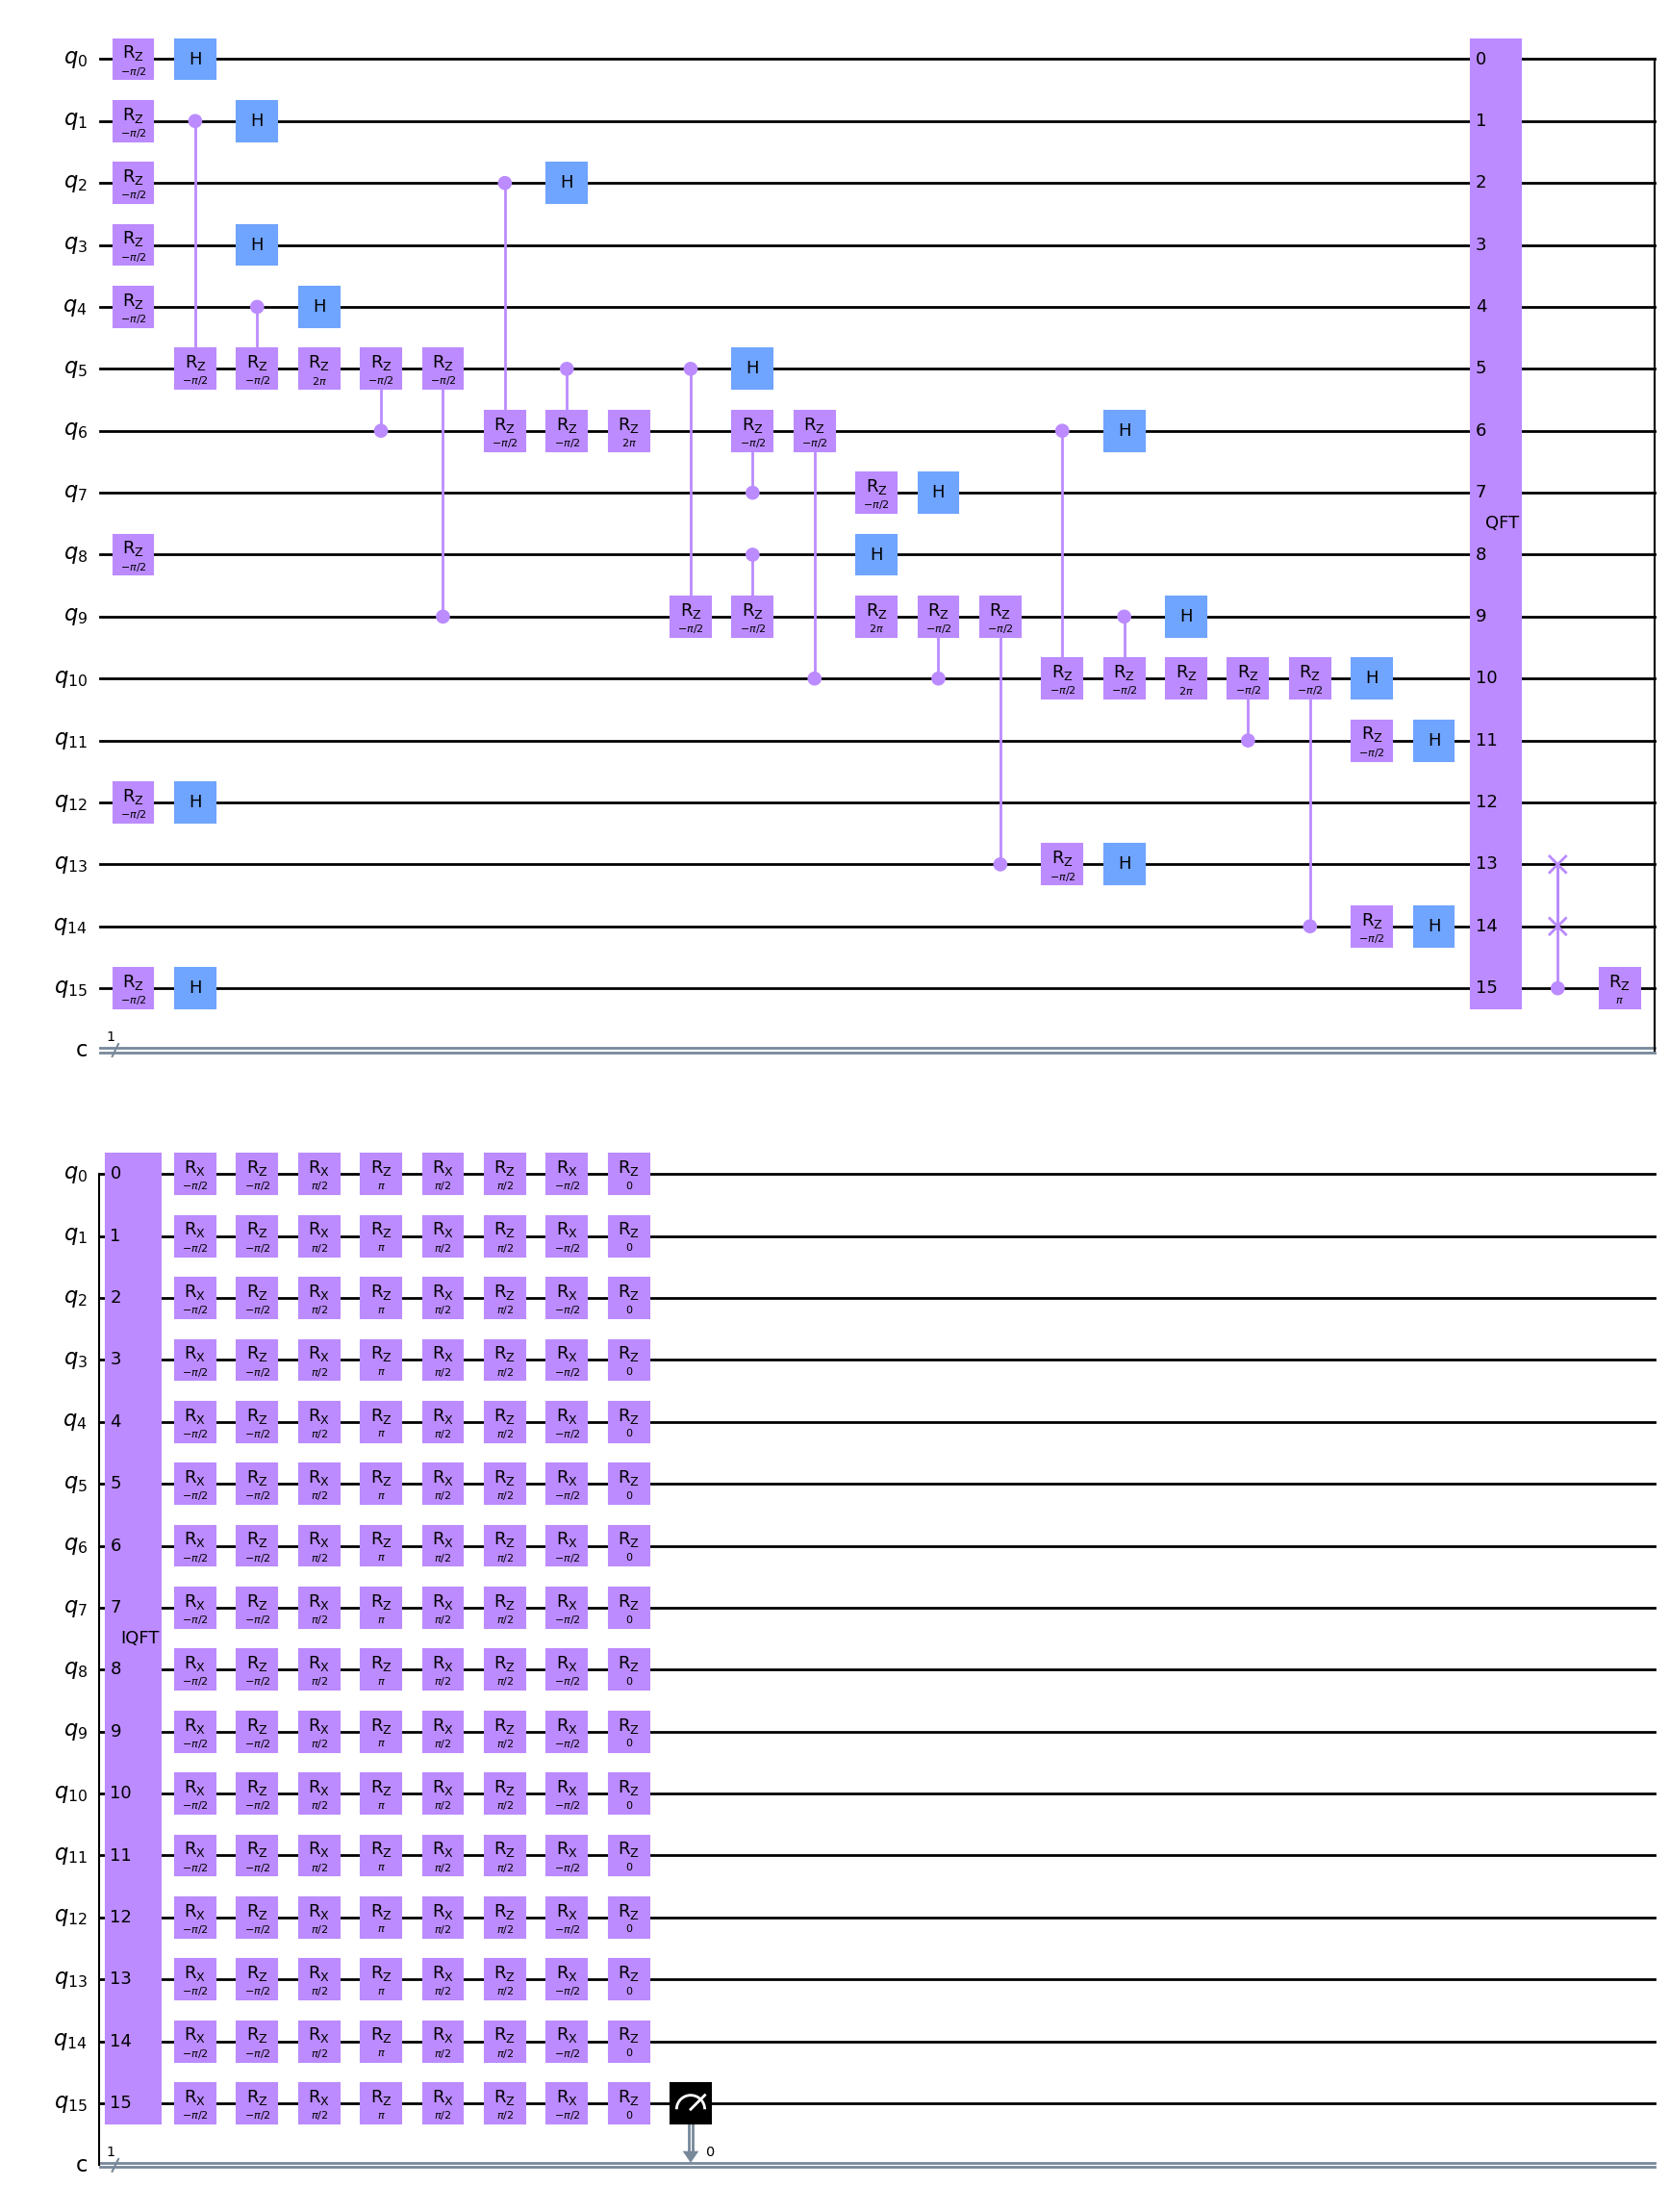

In [2]:
qc.draw('mpl')

In [3]:
from qiskit.providers.aer import AerSimulator

[0.4995119570522206, 0.505002440214739, 0.494265495363592, 0.5051244509516838, 0.49890190336749635]


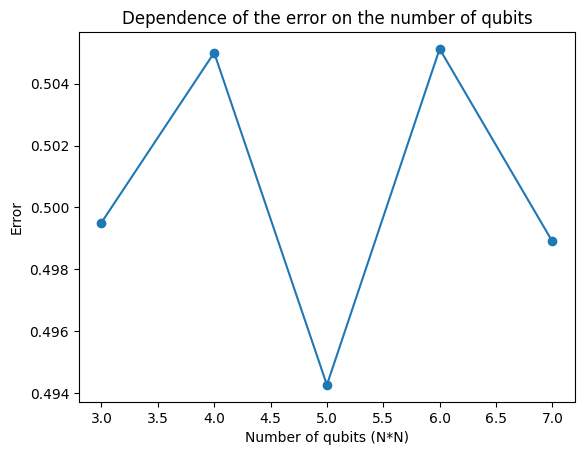

In [4]:
import matplotlib.pyplot as plt

errors = []

# Задайте значения N от 3 до 7
for N in range(3, 8):
    A = np.zeros((N*N, N*N))
    b = np.zeros(N*N)
    h = 1/(N-1)
    for i in range(N):
        for j in range(N):
            idx = i*N+j
            if i == 0 or i == N-1 or j == 0 or j == N-1:
                A[idx, idx] = 1
                b[idx] = 0
            else:
                A[idx, idx] = -4
                A[idx, idx-1] = 1
                A[idx, idx+1] = 1
                A[idx, idx-N] = 1
                A[idx, idx+N] = 1
                b[idx] = 1/h**2

    alpha = np.pi/2
    beta = np.pi/4

    # Создайте квантовую схему с N*N кубитами и 1 классическим битом
    qc = QuantumCircuit(N*N, 1)

    # Примените операторы, соответствующие матрице A
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if i != j and A[i,j] != 0:
                qc.crz(-np.pi/2 * A[i,j], j, i)
            elif i == j and A[i,j] != 0:
                qc.rz(-np.pi/2 * A[i,j], i)

    for i in range(N*N):
        qc.h(i)
    qc.append(QFT(num_qubits=N*N, do_swaps=False, inverse=False), range(N*N))
    qc.cswap(N*N-1, N*N-2, N*N-3)
    qc.rz(np.pi, N*N-1)
    qc.append(QFT(num_qubits=N*N, do_swaps=False, inverse=True), range(N*N))
    for i in range(N*N):
        qc.rx(-np.pi/2, i)
        qc.rz(-alpha, i)
        qc.rx(np.pi/2, i)
        qc.rz(np.pi, i)
        qc.rx(np.pi/2, i)
        qc.rz(alpha, i)
        qc.rx(-np.pi/2, i)
        qc.rz(0, i)

    qc.measure(N*N-1, 0)

    backend = AerSimulator(method='matrix_product_state')
    job = execute(qc, backend, shots=8196)
    result = job.result()
    counts = result.get_counts()

    # Вычисление ошибки
    error = counts.get('0', 0) / sum(counts.values())
    errors.append(error)

# Построение графика ошибки
print(errors)
x = range(3, 8)
plt.plot(x, errors, marker='o')
plt.xlabel('Number of qubits (N*N)')
plt.ylabel('Error')
plt.title('Dependence of the error on the number of qubits')
plt.show()


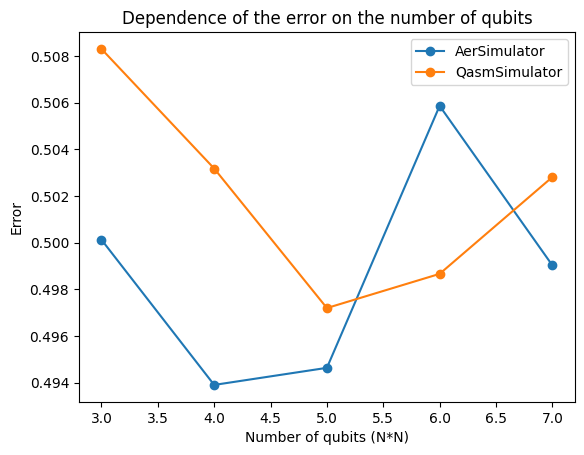

In [10]:
import matplotlib.pyplot as plt

errors_aer = []
errors_qasm = []
errors_statevector = []

# Задайте значения N от 3 до 7
for N in range(3, 8):
    A = np.zeros((N*N, N*N))
    b = np.zeros(N*N)
    h = 1/(N-1)
    for i in range(N):
        for j in range(N):
            idx = i*N+j
            if i == 0 or i == N-1 or j == 0 or j == N-1:
                A[idx, idx] = 1
                b[idx] = 0
            else:
                A[idx, idx] = -4
                A[idx, idx-1] = 1
                A[idx, idx+1] = 1
                A[idx, idx-N] = 1
                A[idx, idx+N] = 1
                b[idx] = 1/h**2

    alpha = np.pi/2
    beta = np.pi/4

    # Создайте квантовую схему с N*N кубитами и 1 классическим битом
    qc = QuantumCircuit(N*N, 1)

    # Примените операторы, соответствующие матрице A
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if i != j and A[i,j] != 0:
                qc.crz(-np.pi/2 * A[i,j], j, i)
            elif i == j and A[i,j] != 0:
                qc.rz(-np.pi/2 * A[i,j], i)

    for i in range(N*N):
        qc.h(i)
    qc.append(QFT(num_qubits=N*N, do_swaps=False, inverse=False), range(N*N))
    qc.cswap(N*N-1, N*N-2, N*N-3)
    qc.rz(np.pi, N*N-1)
    qc.append(QFT(num_qubits=N*N, do_swaps=False, inverse=True), range(N*N))
    for i in range(N*N):
        qc.rx(-np.pi/2, i)
        qc.rz(-alpha, i)
        qc.rx(np.pi/2, i)
        qc.rz(np.pi, i)
        qc.rx(np.pi/2, i)
        qc.rz(alpha, i)
        qc.rx(-np.pi/2, i)
        qc.rz(0, i)

    qc.measure(N*N-1, 0)

    # Вычисление ошибки для AerSimulator
    backend_aer = Aer.get_backend('aer_simulator')
    job_aer = execute(qc, backend_aer, shots=8196)
    result_aer = job_aer.result()
    counts_aer = result_aer.get_counts()
    error_aer = counts_aer.get('0', 0) / sum(counts_aer.values())
    errors_aer.append(error_aer)

    # Вычисление ошибки для QasmSimulator
    backend_qasm = Aer.get_backend('qasm_simulator')
    job_qasm = execute(qc, backend_qasm, shots=8196)
    result_qasm = job_qasm.result()
    counts_qasm = result_qasm.get_counts()
    error_qasm = counts_qasm.get('0', 0) / sum(counts_qasm.values())
    errors_qasm.append(error_qasm)

    # # Вычисление ошибки для StatevectorSimulator
    # backend_statevector = Aer.get_backend('statevector_simulator')
    # job_statevector = execute(qc, backend_statevector)
    # result_statevector = job_statevector.result()
    # statevector = result_statevector.get_statevector()
    # probabilities = np.abs(statevector) ** 2
    # error_statevector = probabilities[0]
    # errors_statevector.append(error_statevector)

# Построение графика ошибки
x = range(3, 8)
plt.plot(x, errors_aer, marker='o', label='AerSimulator')
plt.plot(x, errors_qasm, marker='o', label='QasmSimulator')
plt.xlabel('Number of qubits (N*N)')
plt.ylabel('Error')
plt.title('Dependence of the error on the number of qubits')
plt.legend()
plt.show()


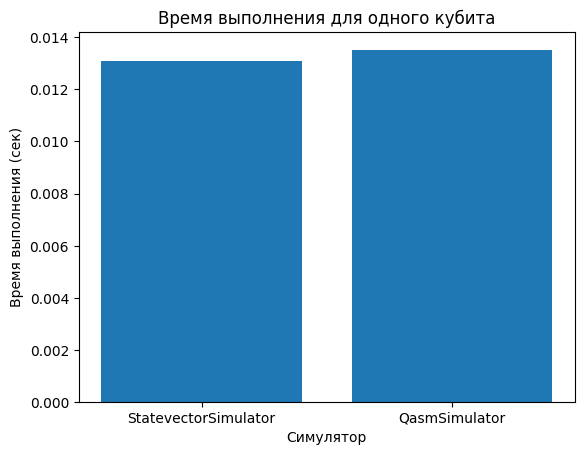

In [5]:
import time
import numpy as np
import matplotlib.pyplot as plt

times_statevector = []
times_qasm = []

# Задайте значение N для одного кубита
N = 2

A = np.zeros((N*N, N*N))
b = np.zeros(N*N)
h = 1/(N-1)
for i in range(N):
    for j in range(N):
        idx = i*N+j
        if i == 0 or i == N-1 or j == 0 or j == N-1:
            A[idx, idx] = 1
            b[idx] = 0
        else:
            A[idx, idx] = -4
            A[idx, idx-1] = 1
            A[idx, idx+1] = 1
            A[idx, idx-N] = 1
            A[idx, idx+N] = 1
            b[idx] = 1/h**2

alpha = np.pi/2
beta = np.pi/4

# Создайте квантовую схему с N*N кубитами и 1 классическим битом
qc = QuantumCircuit(N*N, 1)

# Примените операторы, соответствующие матрице A
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if i != j and A[i,j] != 0:
            qc.crz(-np.pi/2 * A[i,j], j, i)
        elif i == j and A[i,j] != 0:
            qc.rz(-np.pi/2 * A[i,j], i)

for i in range(N*N):
    qc.h(i)
qc.append(QFT(num_qubits=N*N, do_swaps=False, inverse=False), range(N*N))
qc.cswap(N*N-1, N*N-2, N*N-3)
qc.rz(np.pi, N*N-1)
qc.append(QFT(num_qubits=N*N, do_swaps=False, inverse=True), range(N*N))
for i in range(N*N):
    qc.rx(-np.pi/2, i)
    qc.rz(-alpha, i)
    qc.rx(np.pi/2, i)
    qc.rz(np.pi, i)
    qc.rx(np.pi/2, i)
    qc.rz(alpha, i)
    qc.rx(-np.pi/2, i)
    qc.rz(0, i)

qc.measure(N*N-1, 0)

# Вычисление времени выполнения для StatevectorSimulator
backend_statevector = Aer.get_backend('statevector_simulator')
start_time_statevector = time.time()
job_statevector = execute(qc, backend_statevector)
end_time_statevector = time.time()
execution_time_statevector = end_time_statevector - start_time_statevector
times_statevector.append(execution_time_statevector)

# Вычисление времени выполнения для QasmSimulator
backend_qasm = Aer.get_backend('qasm_simulator')
start_time_qasm = time.time()
job_qasm = execute(qc, backend_qasm, shots=8192)
end_time_qasm = time.time()
execution_time_qasm = end_time_qasm - start_time_qasm
times_qasm.append(execution_time_qasm)

# Построение графика времени выполнения
x = ['StatevectorSimulator', 'QasmSimulator']
times = [times_statevector[0], times_qasm[0]]
plt.bar(x, times)
plt.xlabel('Симулятор')
plt.ylabel('Время выполнения (сек)')
plt.title('Время выполнения для одного кубита')
plt.show()


In [ ]:
from qiskit_aer import AerSimulator

In [10]:
import time
import matplotlib.pyplot as plt

times_statevector = []
times_qasm = []
times_matrix_product_state = []
times_extended_stabilizer = []

# Задайте значение N для одного кубита
N = 2

A = np.zeros((N*N, N*N))
b = np.zeros(N*N)
h = 1/(N-1)
for i in range(N):
    for j in range(N):
        idx = i*N+j
        if i == 0 or i == N-1 or j == 0 or j == N-1:
            A[idx, idx] = 1
            b[idx] = 0
        else:
            A[idx, idx] = -4
            A[idx, idx-1] = 1
            A[idx, idx+1] = 1
            A[idx, idx-N] = 1
            A[idx, idx+N] = 1
            b[idx] = 1/h**2

alpha = np.pi/2
beta = np.pi/4

# Создайте квантовую схему с N*N кубитами и 1 классическим битом
qc = QuantumCircuit(N*N, 1)

# Примените операторы, соответствующие матрице A
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if i != j and A[i,j] != 0:
            qc.crz(-np.pi/2 * A[i,j], j, i)
        elif i == j and A[i,j] != 0:
            qc.rz(-np.pi/2 * A[i,j], i)

for i in range(N*N):
    qc.h(i)
qc.append(QFT(num_qubits=N*N, do_swaps=False, inverse=False), range(N*N))
qc.cswap(N*N-1, N*N-2, N*N-3)
qc.rz(np.pi, N*N-1)
qc.append(QFT(num_qubits=N*N, do_swaps=False, inverse=True), range(N*N))
for i in range(N*N):
    qc.rx(-np.pi/2, i)
    qc.rz(-alpha, i)
    qc.rx(np.pi/2, i)
    qc.rz(np.pi, i)
    qc.rx(np.pi/2, i)
    qc.rz(alpha, i)
    qc.rx(-np.pi/2, i)
    qc.rz(0, i)

qc.measure(N*N-1, 0)

# Вычисление времени выполнения для StatevectorSimulator
backend_statevector = Aer.get_backend('statevector_simulator')
start_time_statevector = time.time()
job_statevector = execute(qc, backend_statevector)
end_time_statevector = time.time()
execution_time_statevector = end_time_statevector - start_time_statevector
times_statevector.append(execution_time_statevector)

# Вычисление времени выполнения для QasmSimulator
backend_qasm = Aer.get_backend('qasm_simulator')
start_time_qasm = time.time()
job_qasm = execute(qc, backend_qasm, shots=8192)
end_time_qasm = time.time()
execution_time_qasm = end_time_qasm - start_time_qasm
times_qasm.append(execution_time_qasm)

# Вычисление времени выполнения для MatrixProductStateSimulator
backend_matrix_product_state = Aer.get_backend('aer_simulator_statevector')
start_time_matrix_product_state = time.time()
job_matrix_product_state = execute(qc, backend_matrix_product_state)
end_time_matrix_product_state = time.time()
execution_time_matrix_product_state = end_time_matrix_product_state - start_time_matrix_product_state
times_matrix_product_state.append(execution_time_matrix_product_state)

# Вычисление времени выполнения для ExtendedStabilizerSimulator
backend_extended_stabilizer = Aer.get_backend('pulse_simulator')
start_time_extended_stabilizer = time.time()
job_extended_stabilizer = execute(qc, backend_extended_stabilizer)
end_time_extended_stabilizer = time.time()
execution_time_extended_stabilizer = end_time_extended_stabilizer - start_time_extended_stabilizer
times_extended_stabilizer.append(execution_time_extended_stabilizer)

# Построение графика времени выполнения для четырех симуляторов
x = ['StatevectorSimulator', 'QasmSimulator', 'MatrixProductStateSimulator', 'ExtendedStabilizerSimulator']
times = [times_statevector[0], times_qasm[0], times_matrix_product_state[0], times_extended_stabilizer[0]]
plt.bar(x, times)
plt.xlabel('Симулятор')
plt.ylabel('Время выполнения (сек)')
plt.title('Время выполнения для одного кубита')
plt.show()


Traceback (most recent call last):
  Cell In[10], line 88
    job_extended_stabilizer = execute(qc, backend_extended_stabilizer)
  File /opt/conda/lib/python3.10/site-packages/qiskit/utils/deprecation.py:182 in wrapper
    return func(*args, **kwargs)
  File /opt/conda/lib/python3.10/site-packages/qiskit/utils/deprecation.py:182 in wrapper
    return func(*args, **kwargs)
  File /opt/conda/lib/python3.10/site-packages/qiskit/execute_function.py:302 in execute
    experiments = transpile(
  File /opt/conda/lib/python3.10/site-packages/qiskit/compiler/transpiler.py:381 in transpile
    _serial_transpile_circuit(
  File /opt/conda/lib/python3.10/site-packages/qiskit/compiler/transpiler.py:463 in _serial_transpile_circuit
    result = pass_manager.run(circuit, callback=callback, output_name=output_name)
  File /opt/conda/lib/python3.10/site-packages/qiskit/transpiler/passmanager.py:537 in run
    return super().run(circuits, output_name, callback)
  File /opt/conda/lib/python3.10/site-pack

/tmp/ipykernel_264/1074023020.py:86: DeprecationWarning: The Pulse simulator backend in Qiskit Aer is deprecated and will be removed in a future release. Instead the qiskit-dynamics library should be used instead for simulating at the pulse level.
  backend_extended_stabilizer = Aer.get_backend('pulse_simulator')
